In [2]:
import numpy as np
import cv2
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


# ALTER(OLD) ALGORITHMUS

6
0
(100, 640)
6
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
5
0
(100, 640)
6
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
3
0
(100, 

0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
2
0
(100, 640)
1
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
4
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
3
0
(100, 640)
3
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
2
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 640)
1
0
(100, 64

KeyboardInterrupt: 

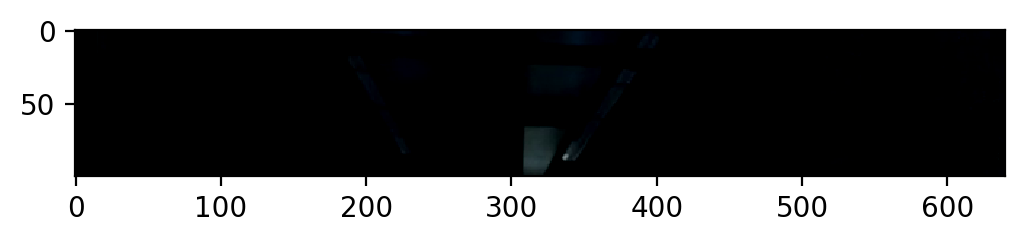

In [6]:
vidcap = cv2.VideoCapture('1556872376191_video.mp4')

count = 0
while True:
    success,img = vidcap.read()
    L = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    rcParams['figure.dpi']= 200

    gray = cv2.cvtColor(img[:][0:100][::], cv2.COLOR_BGR2GRAY)

    #figure(figsize=(20,20))

    #ret, thresh = cv2.threshold(img, 127, 255, 0)
    #im2, contours, hierarchy = cv2.findContours(cv2.filter2D(gray, -1, L), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    im2, contours, hierarchy = cv2.findContours(cv2.filter2D(cv2.Canny(gray,120,250), -1, L), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    counter = 0
    new_contour = []
    print(len(contours))
    for i in range(0,len(contours)):
        #approx = cv2.approxPolyDP(contours[i],cv2.arcLength(contours[i],True)*0.02,True)
        epsilon = 0.1*cv2.arcLength(contours[i],True)
        approx = cv2.approxPolyDP(contours[i], epsilon, closed=True)
        #print(approx)
        if(abs(cv2.contourArea(contours[i])) > 2 and len(approx) == 2 and not(cv2.isContourConvex(approx))):
        #if(len(approx) < 3):
            #print(contours[i])
            new_contour.append(contours[i])
            x,y,w,h = cv2.boundingRect(contours[i])
            if(w > 15 and (y + h) > 98 and h > 30):
                cv2.rectangle(img, (x, y + 1), (x + w, y + w), (0, 255, 0), 2)
                counter = counter + 1
    #ret, gray = cv2.threshold(gray,90,255,cv2.THRESH_BINARY)
    imshow(img[:][:100][::])   
    cv2.drawContours(gray, new_contour, -1, (255,0,0), 1)
    imshow(img[:][:100][::])   
    print(counter)
    print(gray.shape)


## CONTOUR BILDER SPEICHERN

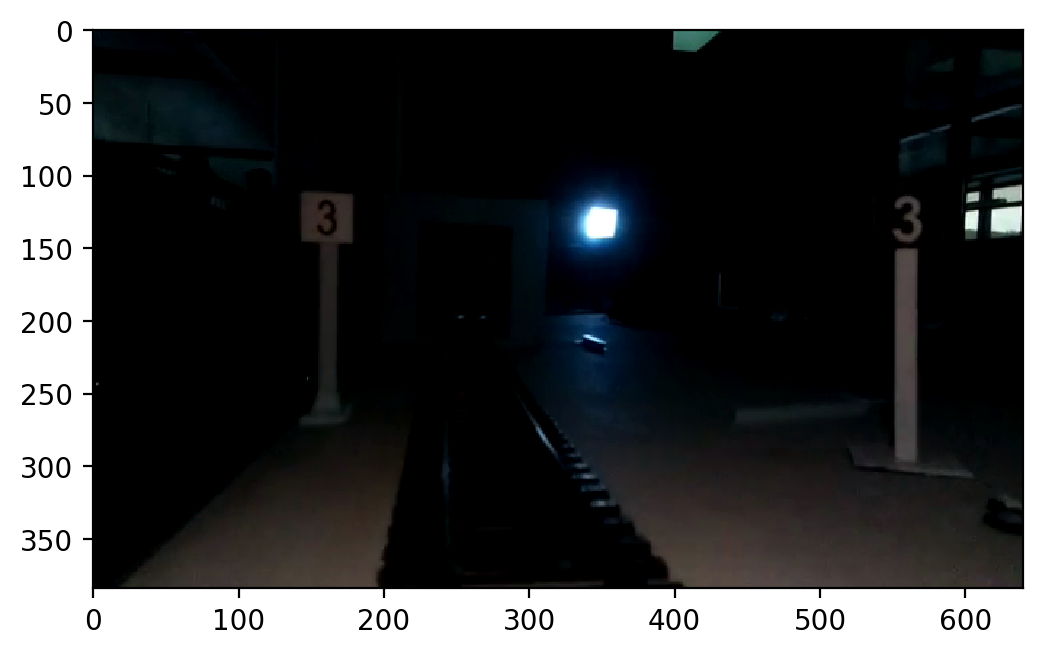

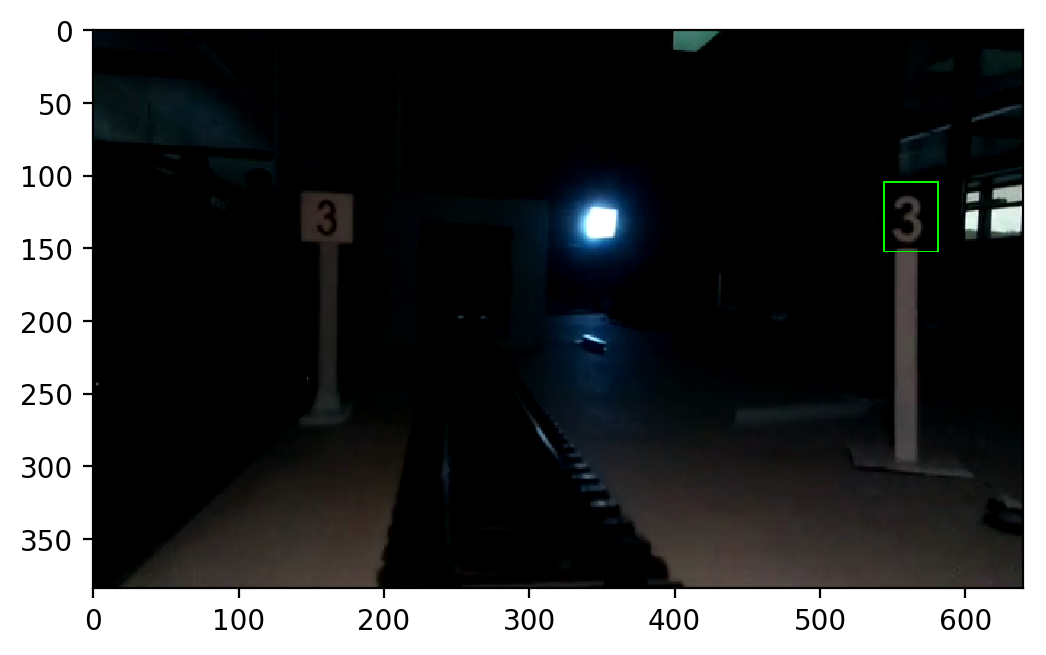

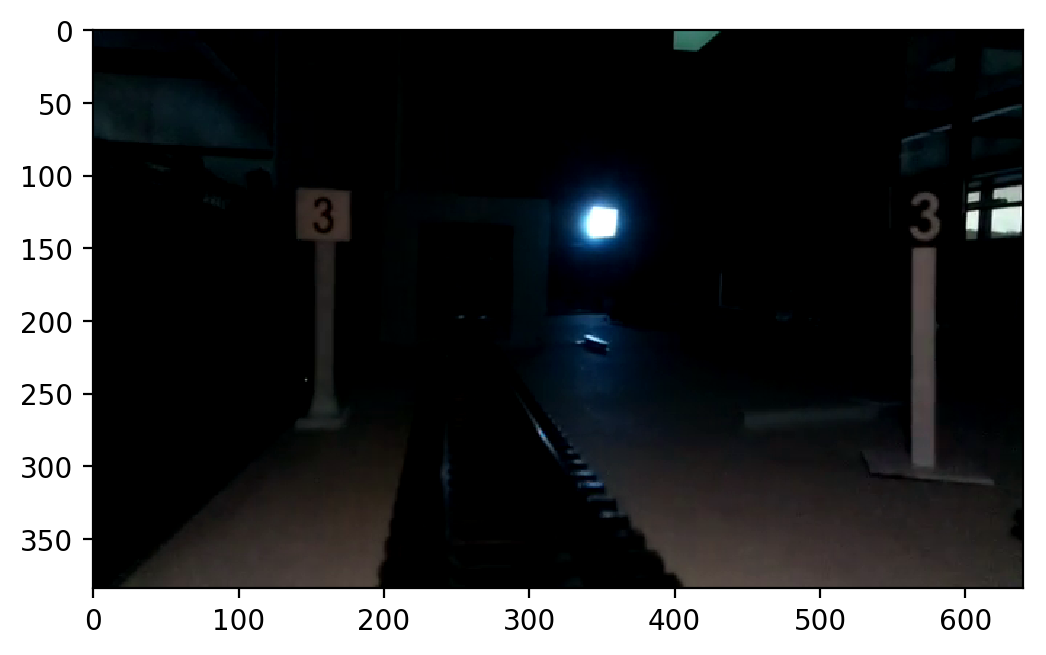

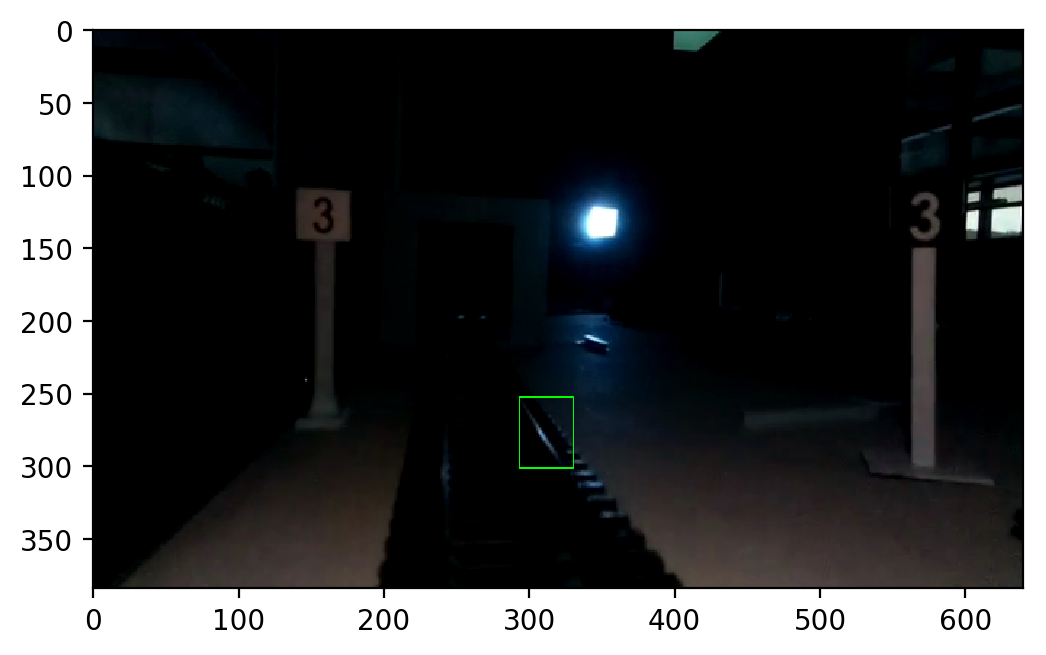

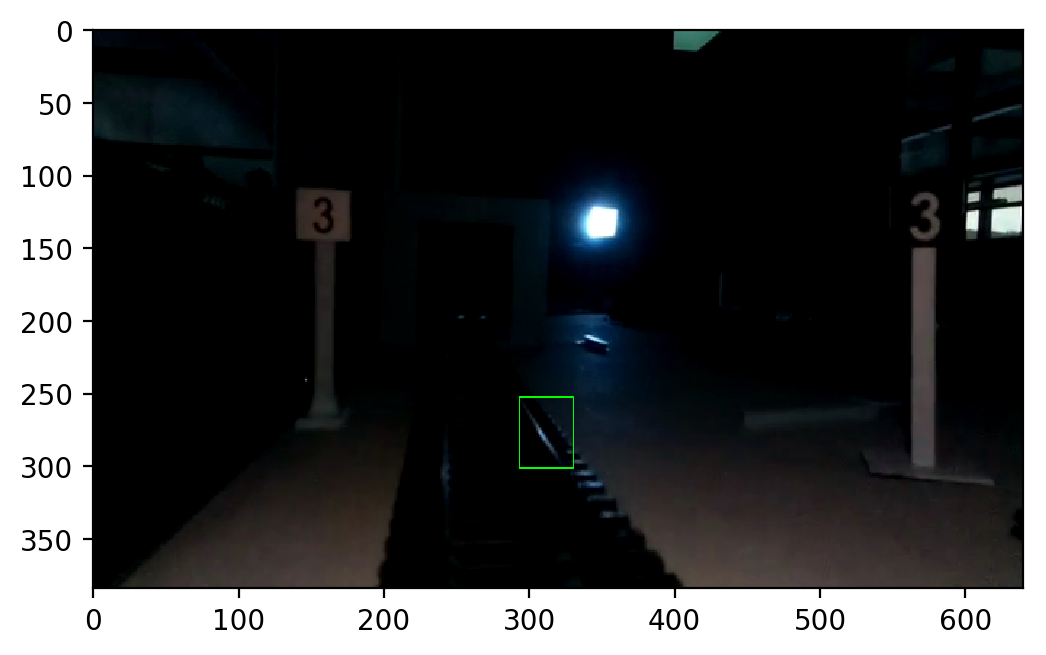

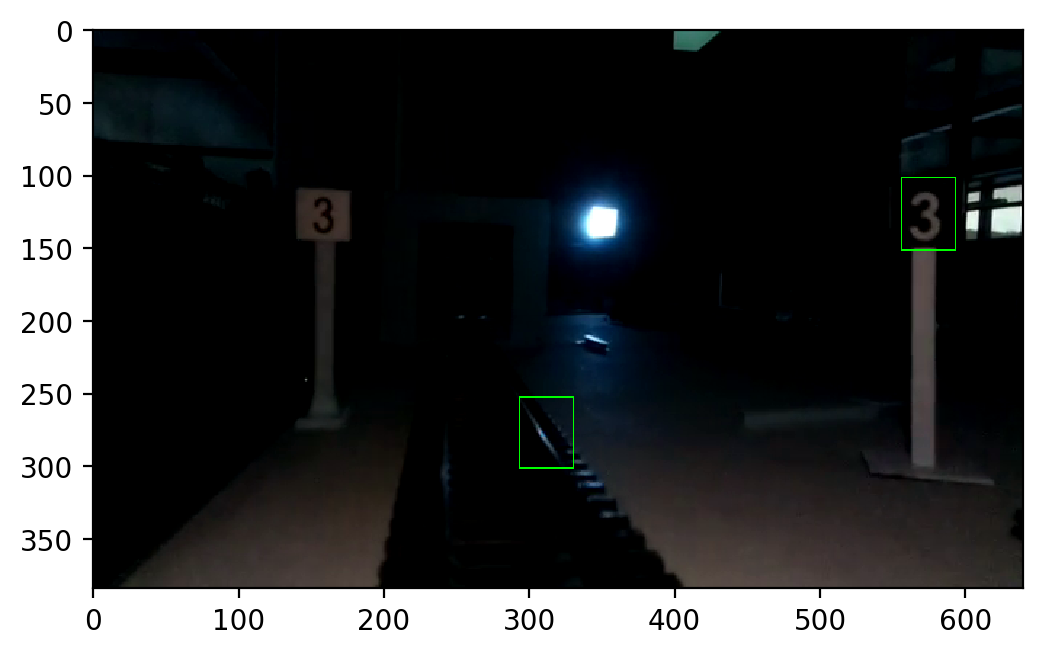

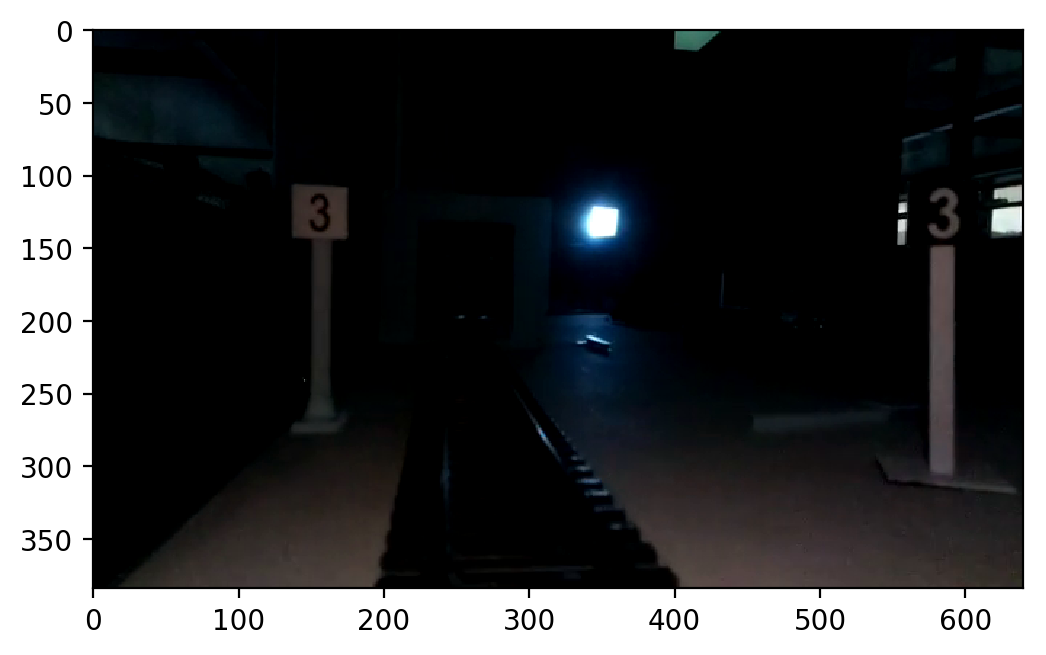

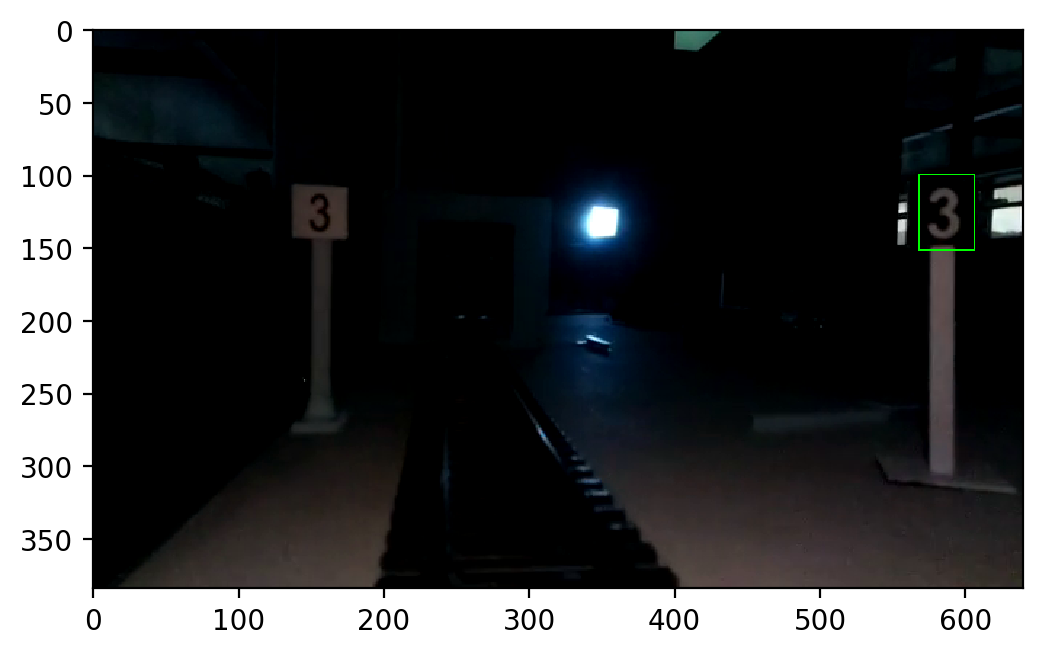

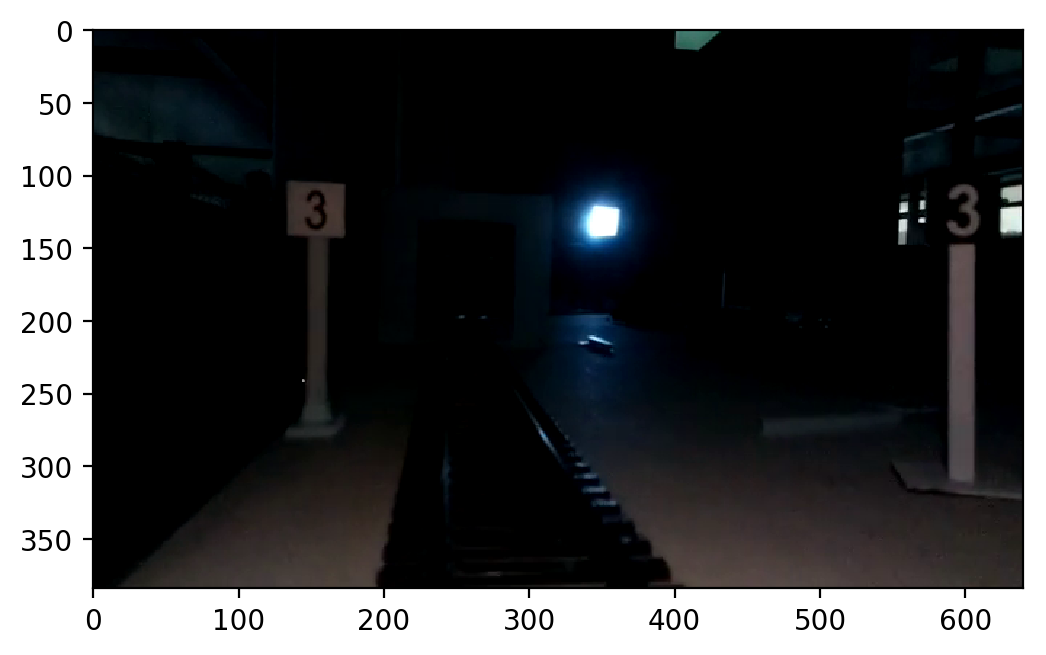

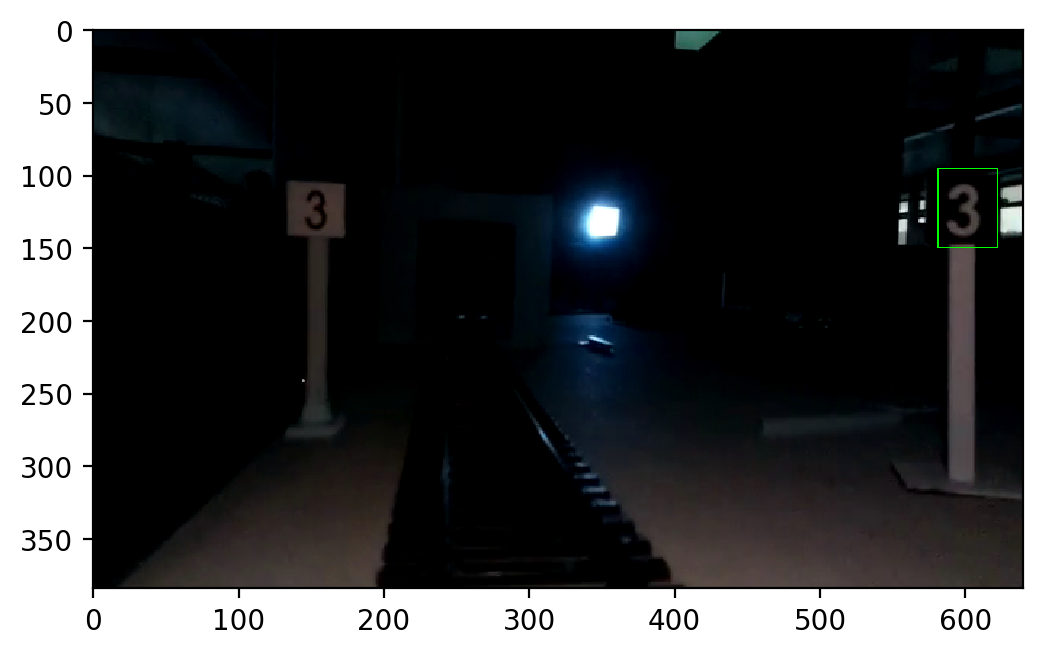

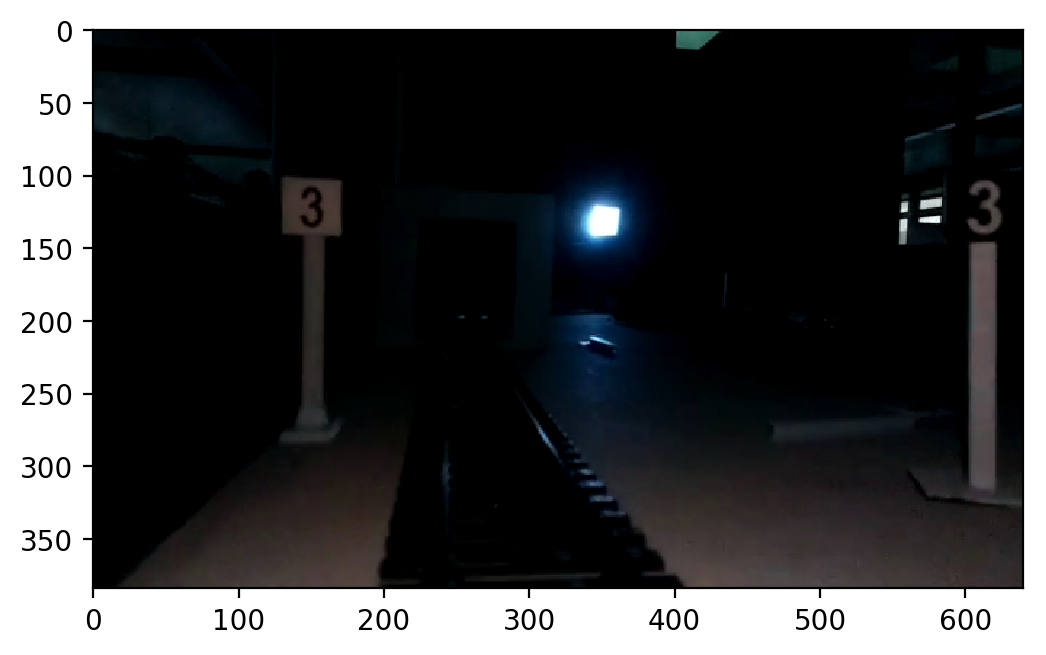

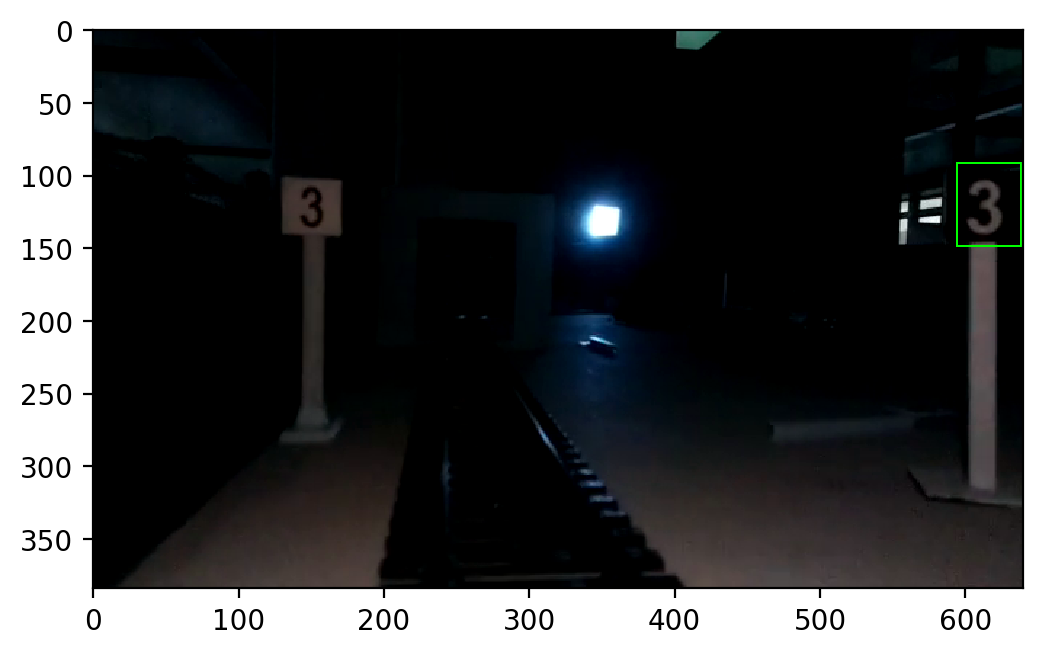

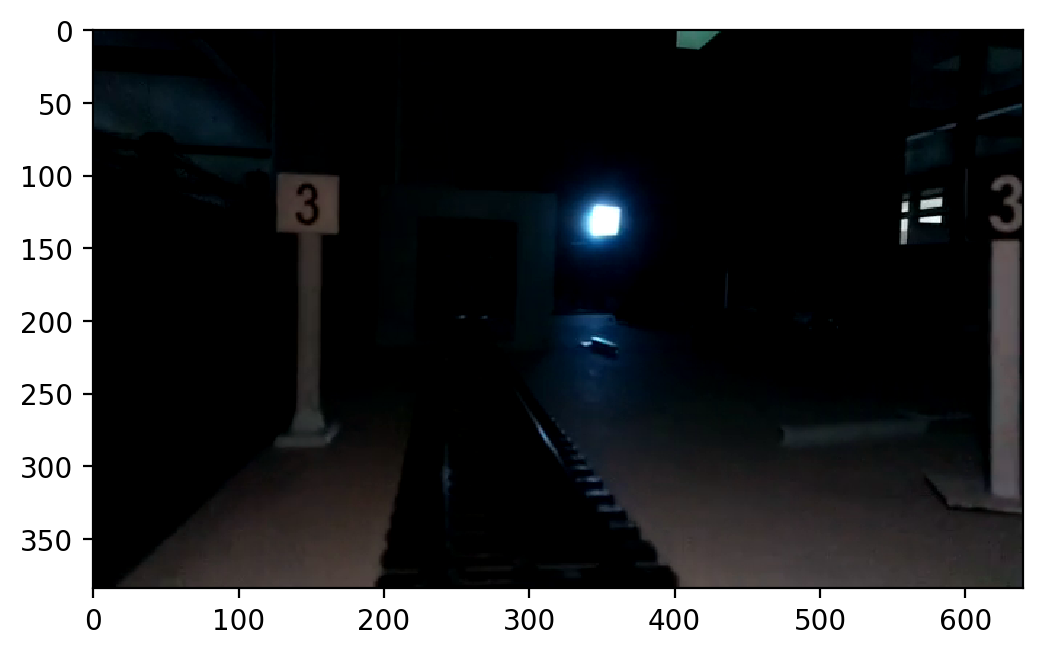

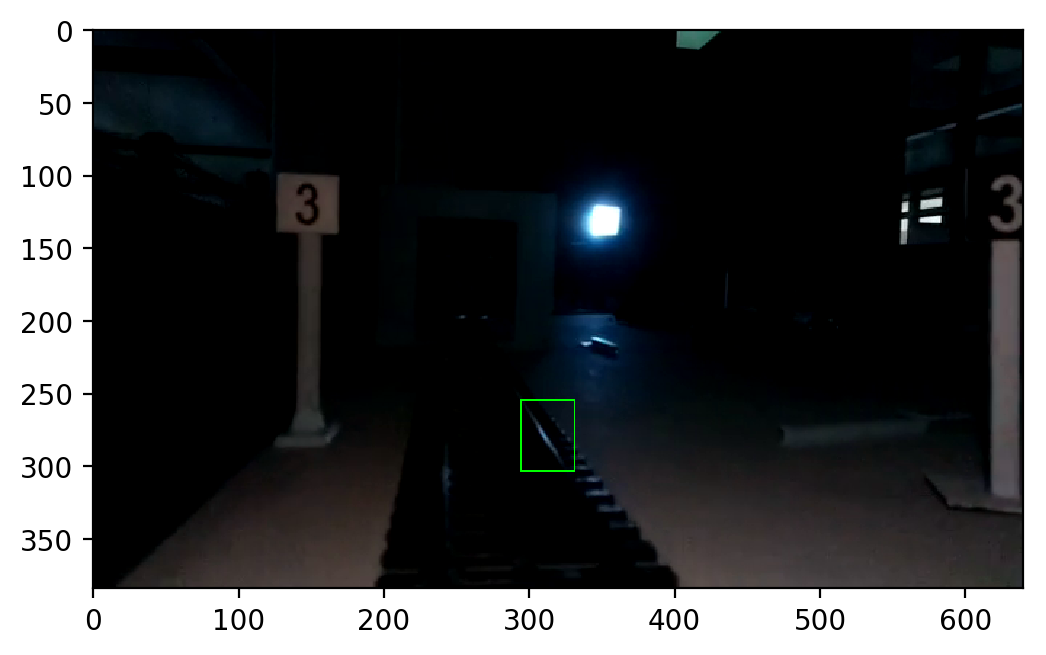

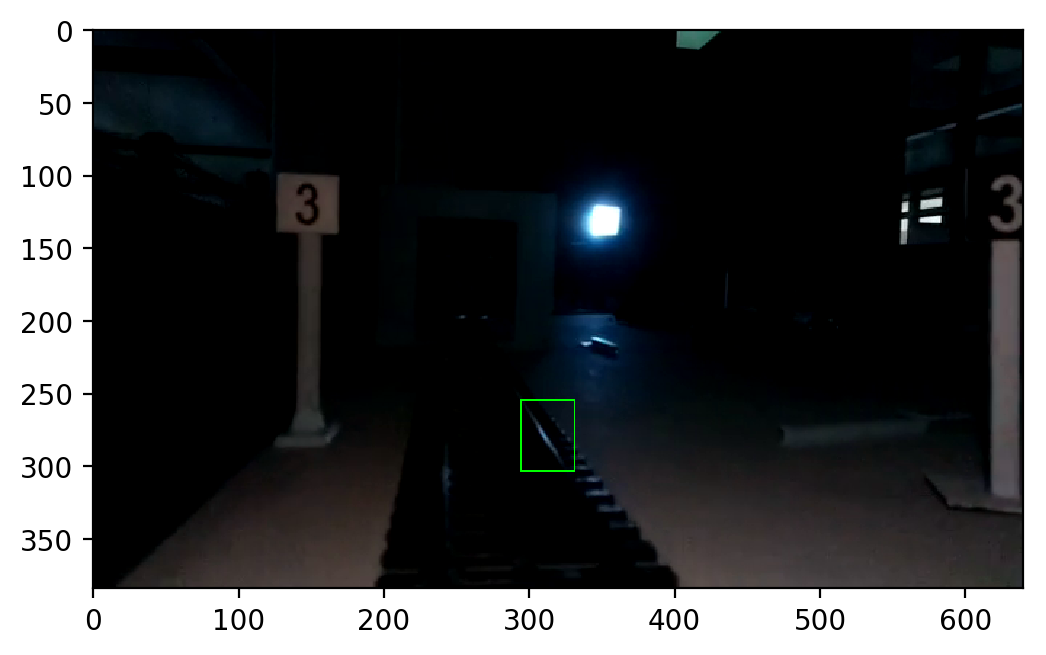

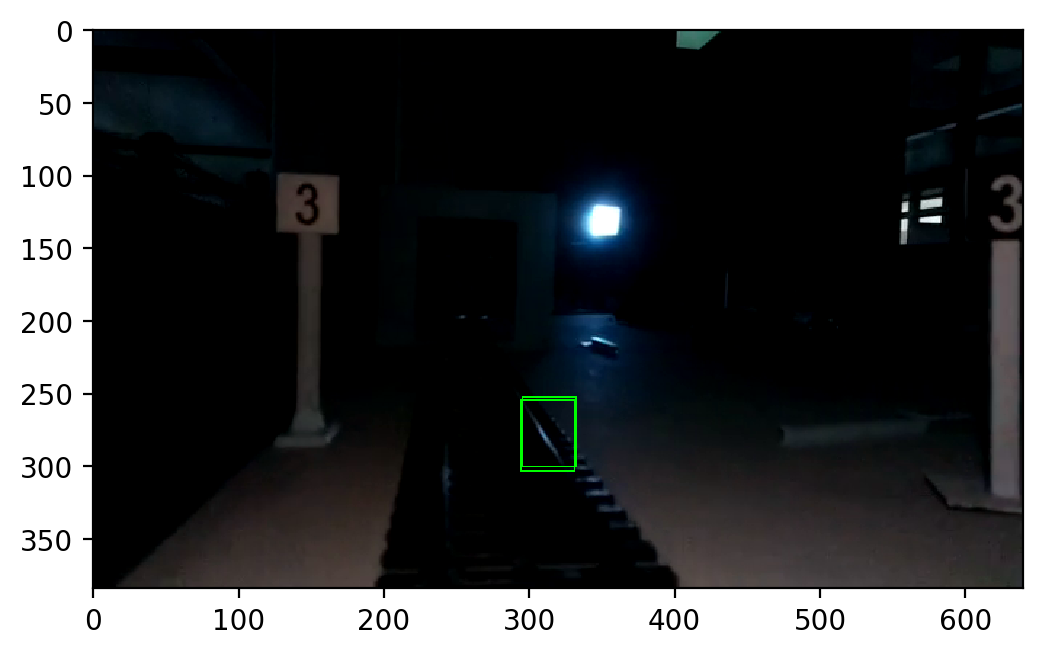

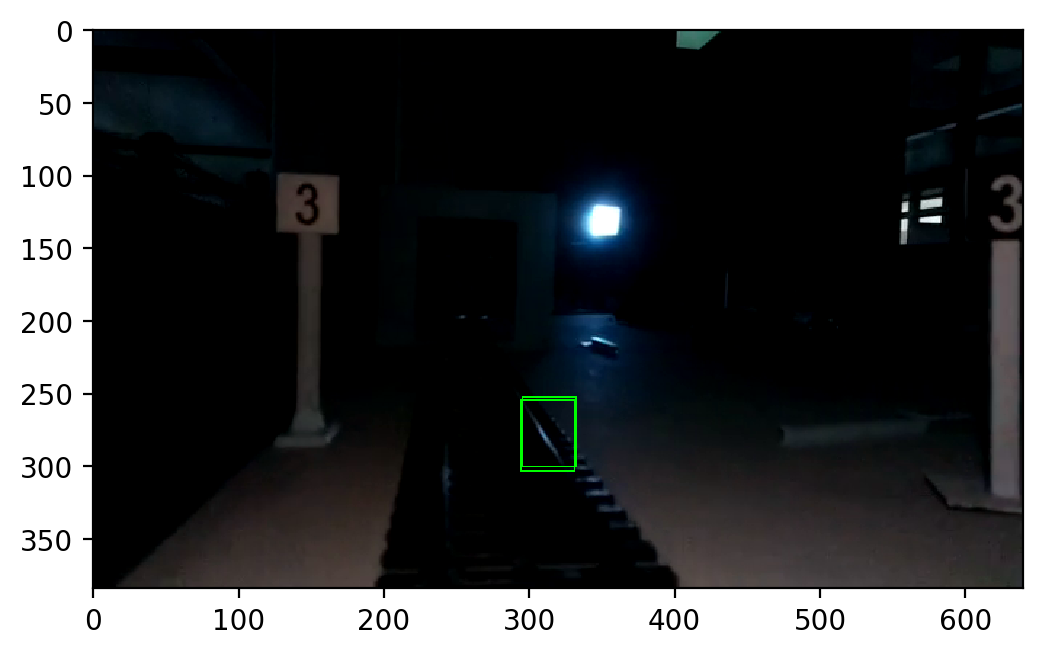

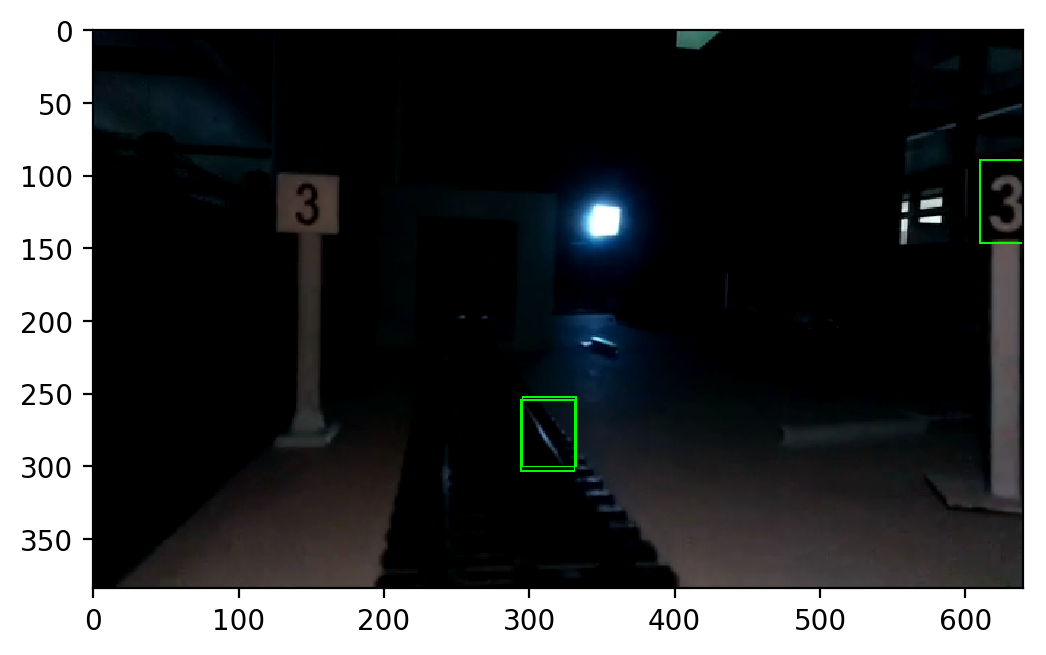

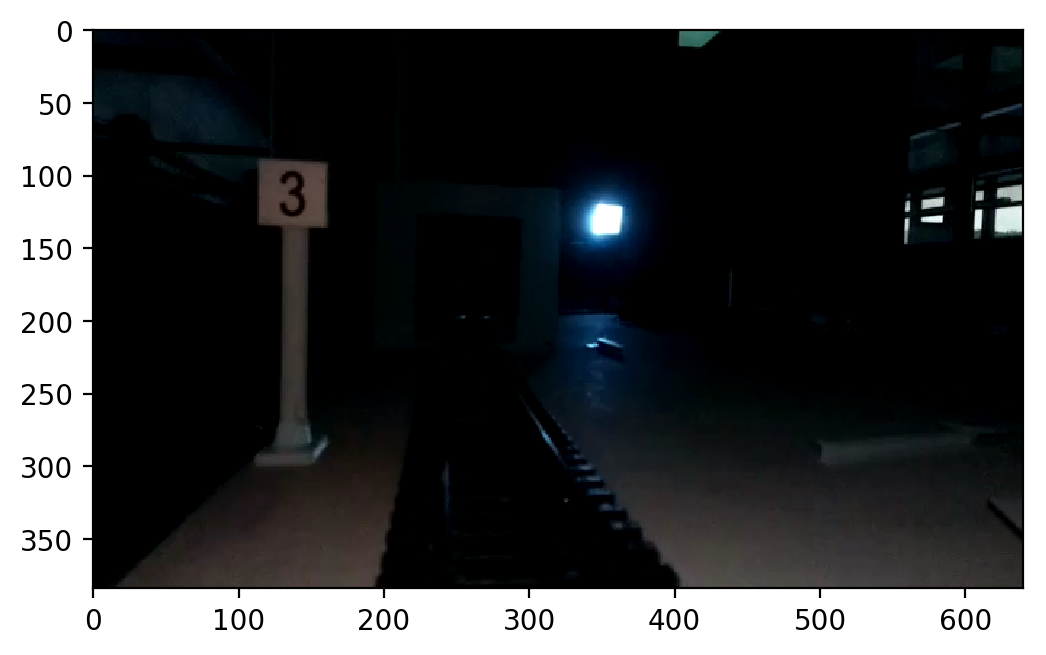

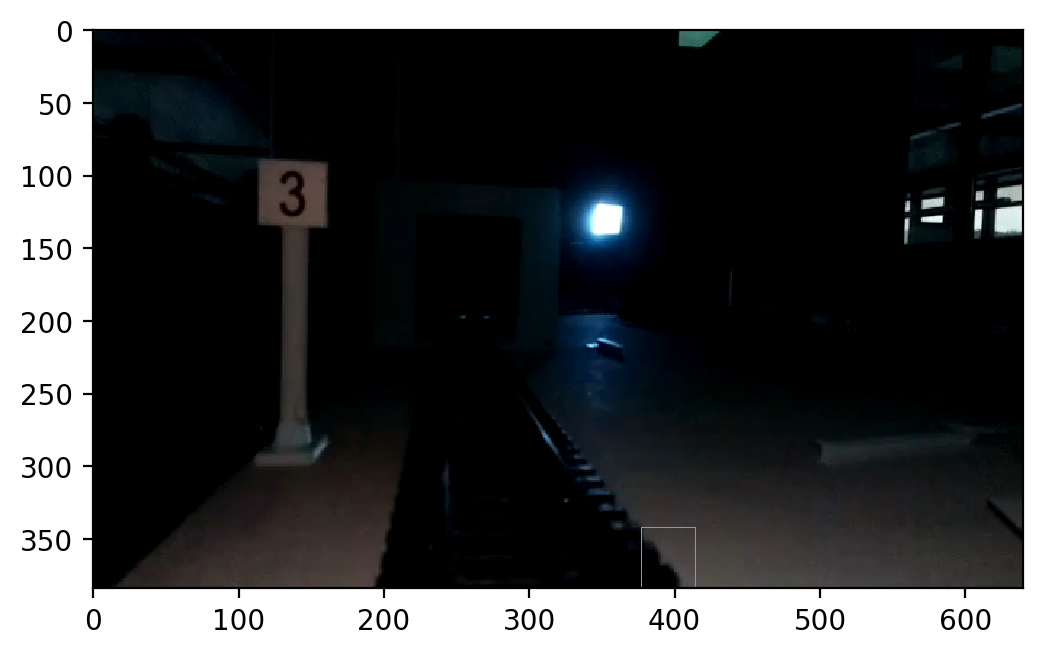

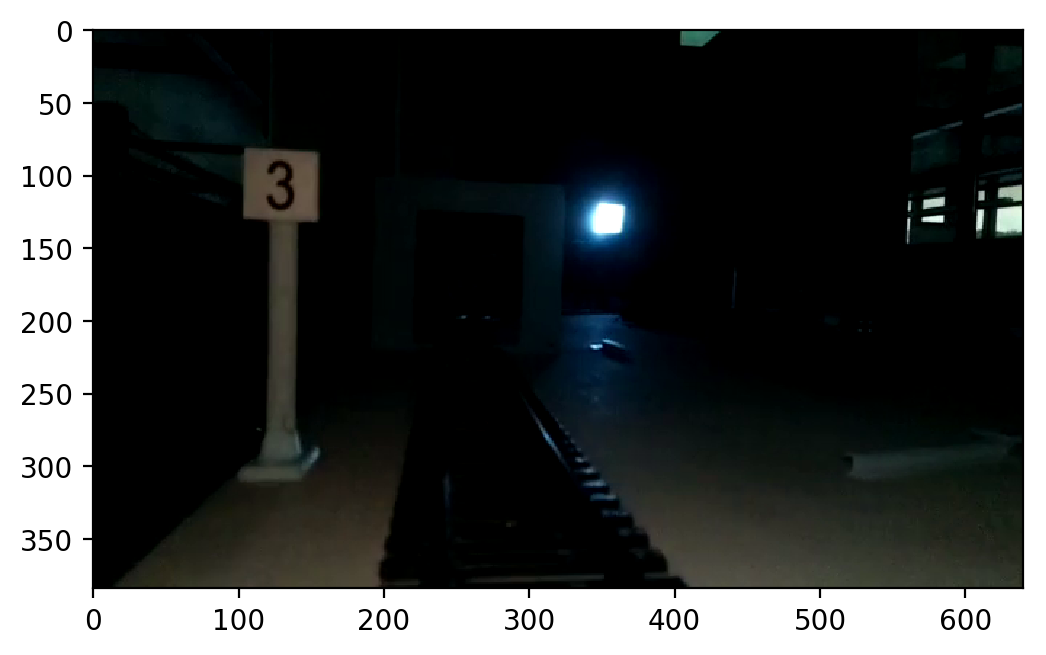

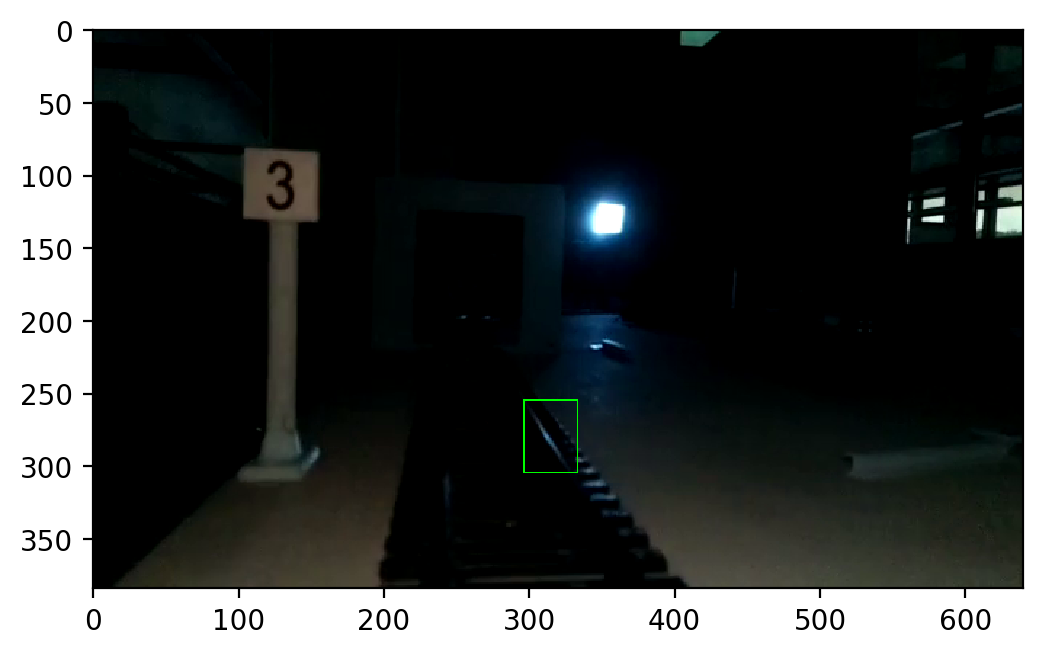

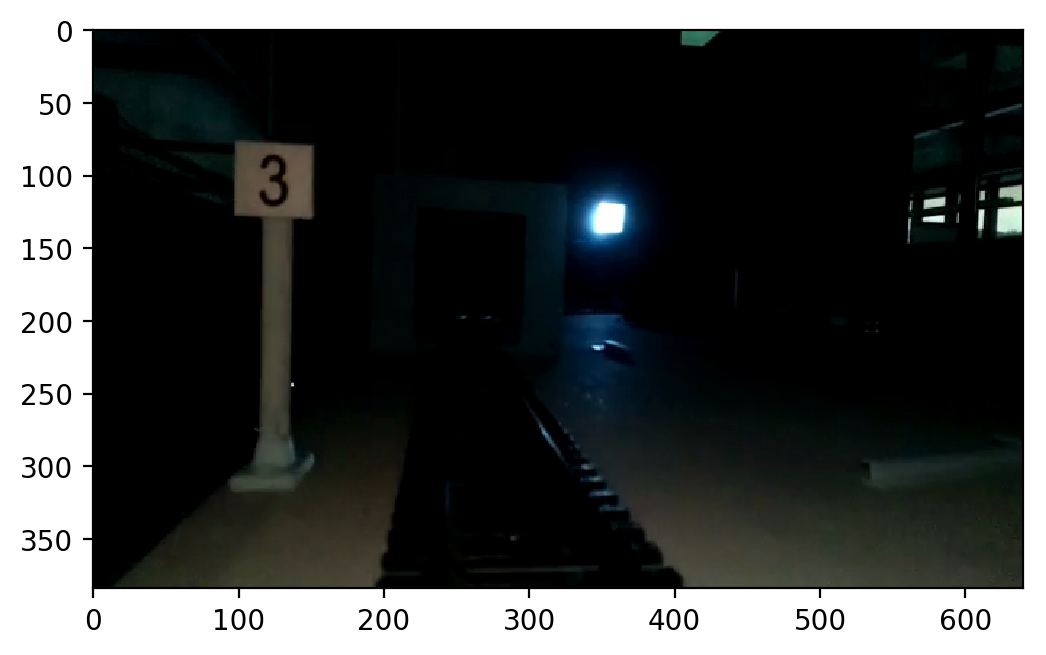

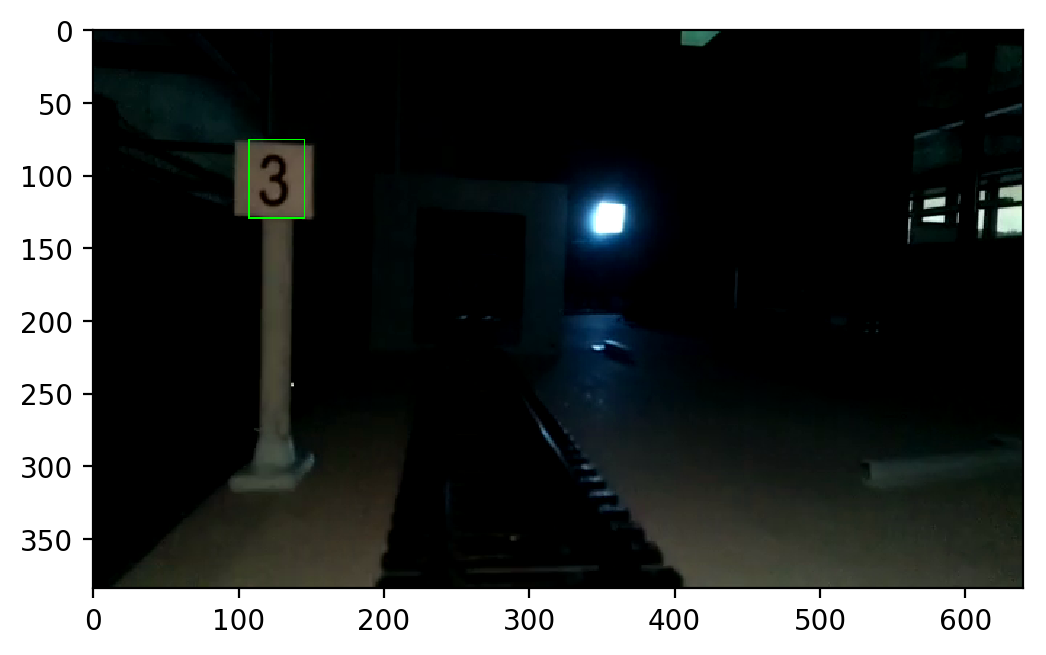

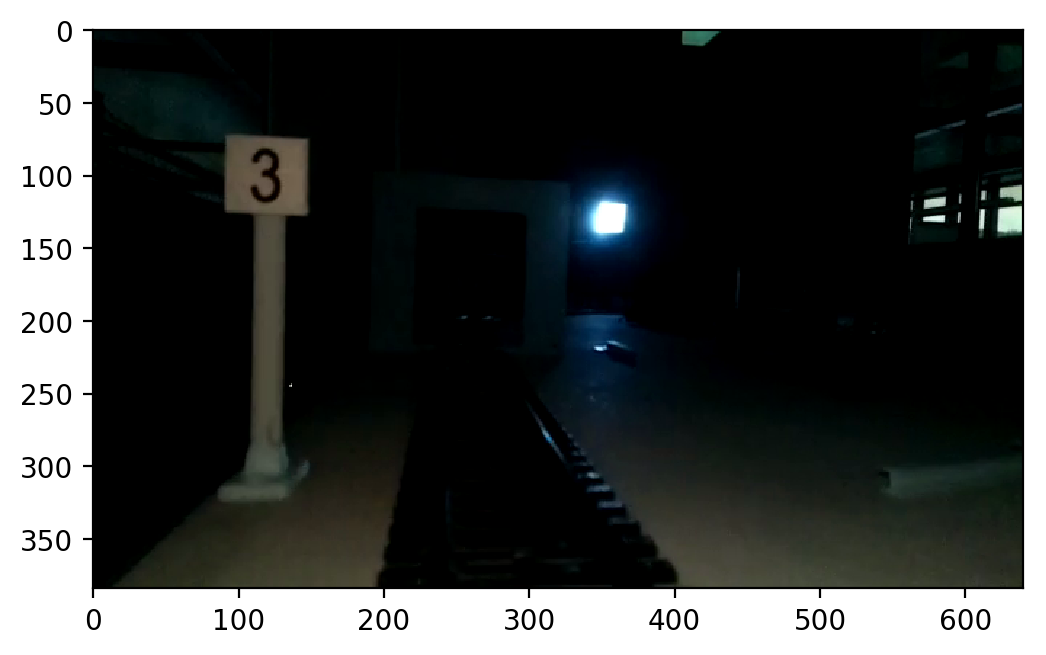

In [ ]:

#from pytesseract import image_to_string

vidcap = cv2.VideoCapture('1556872376191_video.mp4')

count = 0
while True:
    success,img = vidcap.read()

    #print(img.shape)
    L = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    rcParams['figure.dpi']= 200
    #img = img[0: 192, 0:320]
    #img = img[50: 150, 0:400] #infosignal
    #img = img[200:500, 0:300] #Haltesignal
    import glob
    number = 0

#    for i in range (0,1000):
#        start = time.time()
    gray = cv2.cvtColor(img[:][:][::], cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray,120,250)
    im2, contours, hierarchy = cv2.findContours(cv2.filter2D(canny, -1, L), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    counter = 0
    new_contour = []
    for i in range(0,len(contours)):
        #epsilon = 0.1*cv2.arcLength(contours[i],True)
        #approx = cv2.approxPolyDP(contours[i], epsilon, closed=True)
        #if(abs(cv2.contourArea(contours[i])) > 2 and len(approx) == 2 and not(cv2.isContourConvex(approx))):
        if(abs(cv2.contourArea(contours[i])) > 2):
            new_contour.append(contours[i])
            x,y,w,h = cv2.boundingRect(contours[i])
            rel = h / w
            addh = int(h / 5)
            addw = int(w / 2)
            if(rel > 1.5 and h > 20 and h < 50 and w > 20 and w < 50):
                plt.imshow(img, cmap='gray')
                plt.show()
                cv2.rectangle(img, (x - addh, y - addw), (x + w + addw, y + h + addh), (0, 255, 0), 1)
                #cv2.polylines(img, [contours[i]], False, (255,255,255), 3)
                
                #print("- " + image_to_string(cv2.threshold(cont[y - addw:y + h + addh,x - addh:x + w + addw], 30, 255, cv2.THRESH_BINARY)[1], lang='eng', config='--psm 10')+ " -")
                #imshow(cv2.threshold(gray[y - addh:y + h + addh,x - addw:x + w + addw], 30, 255, cv2.THRESH_BINARY)[1],cmap='gray')
                #print(gray[y - addw:y + h + addh,x - addh:x + w + addw])
                #cv2.drawContours(img, new_contour, -1, (0,255,0), 1)
                plt.imshow(img, cmap='gray')
                plt.show()
                #imshow(cv2.bitwise_not(img[y - addh:y + h + addh,x - addw:x + w + addw]))
                counter = counter + 1

    number = number + 1
    #filename = "%05d" % number 
    #cv2.imwrite('C:/data/pi/new/numbers/' + filename + '.jpg', img)
#imshow(cont)

finish = time.time()
#print('%.5ffps' % ((finish - start)))



# MOVIE MAKER

import cv2
import os



image_folder = 'C:/data/pi/new/numbers/'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter('output.mp4', 0x00000021, 10, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))


# ZAHLEN MALEN

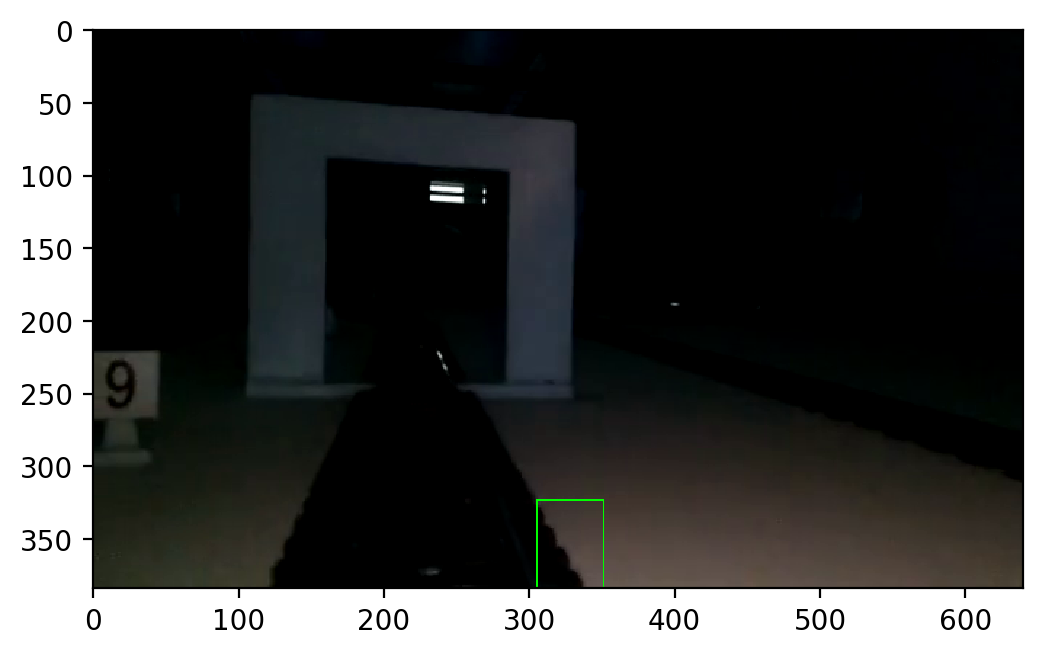

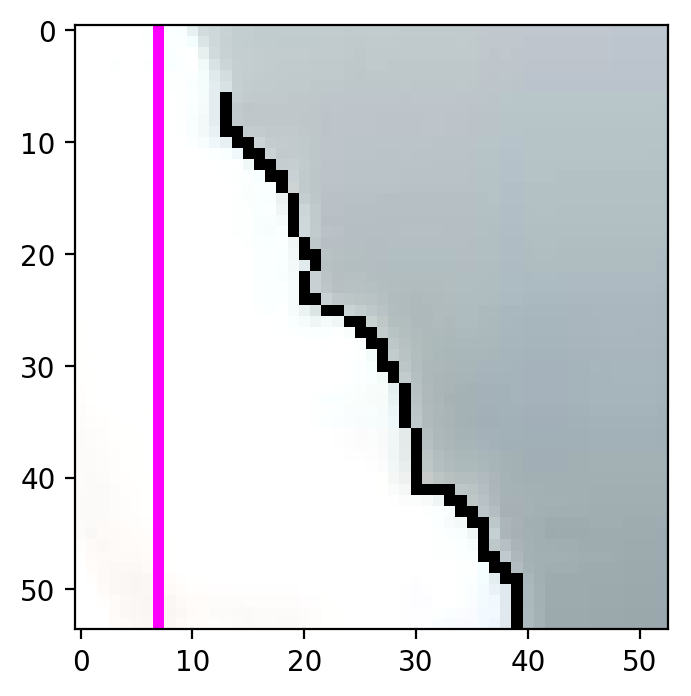

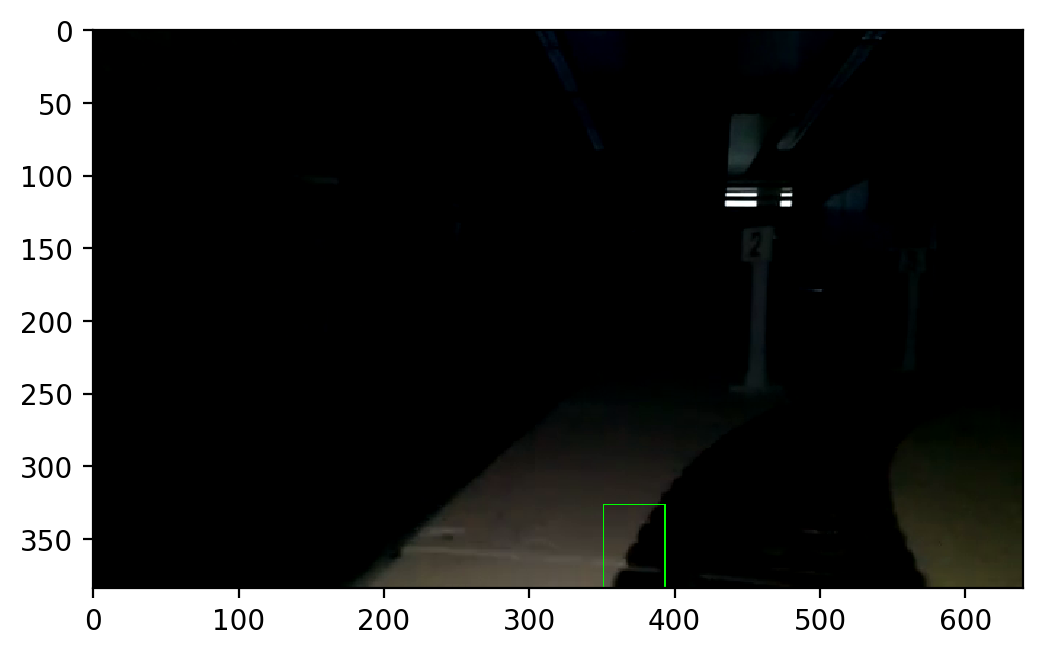

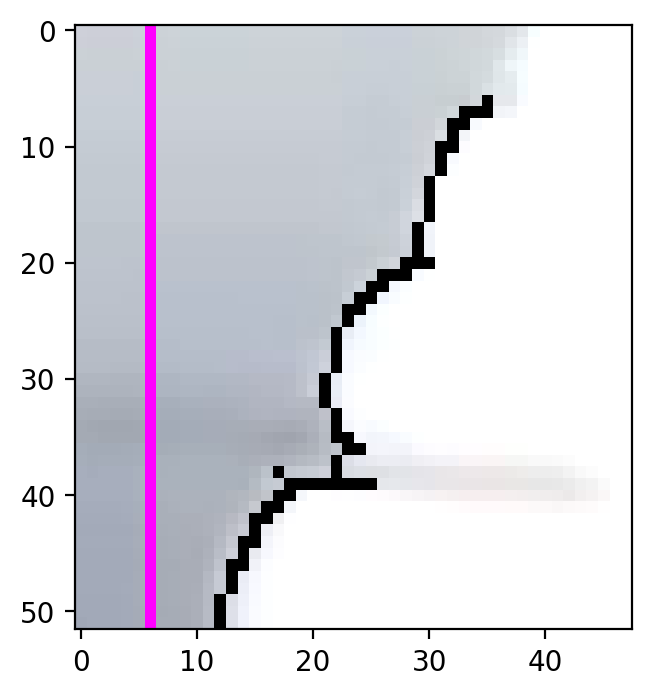

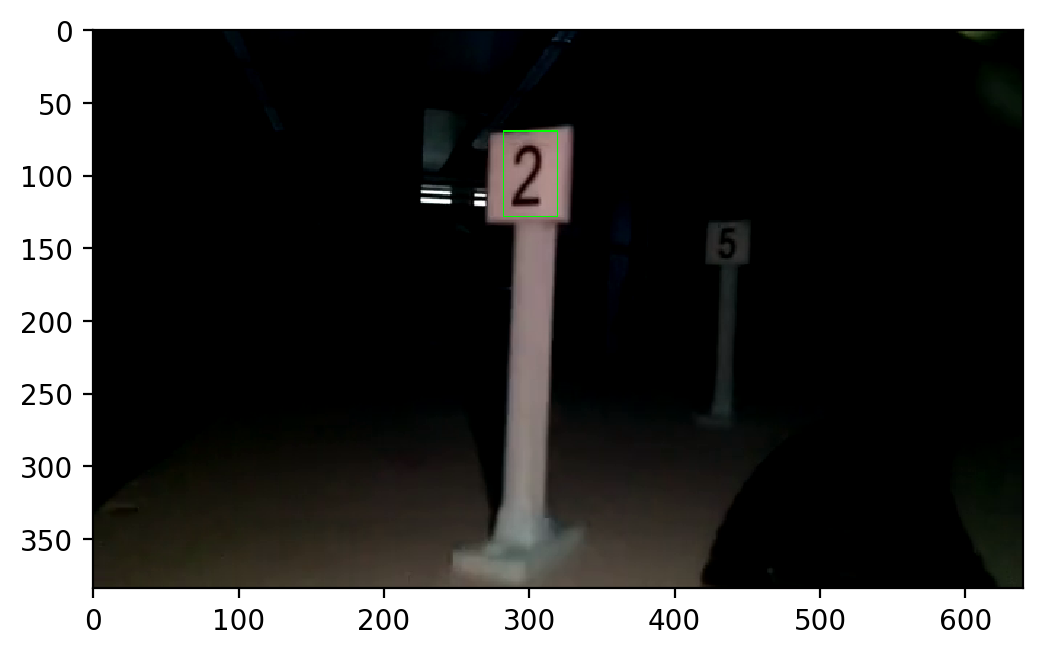

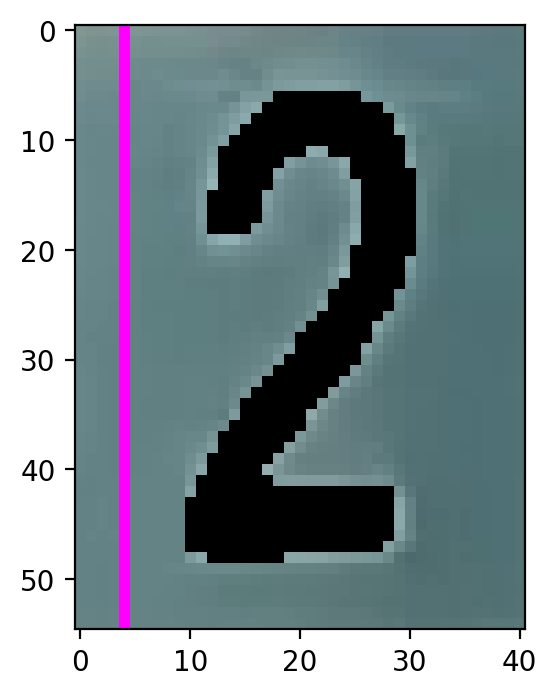

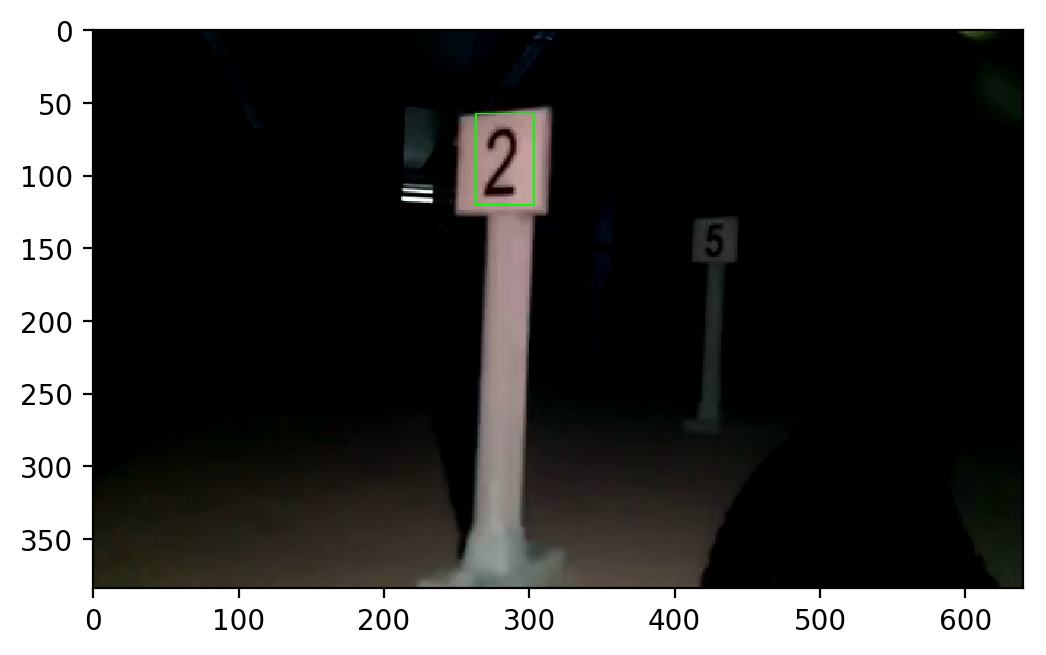

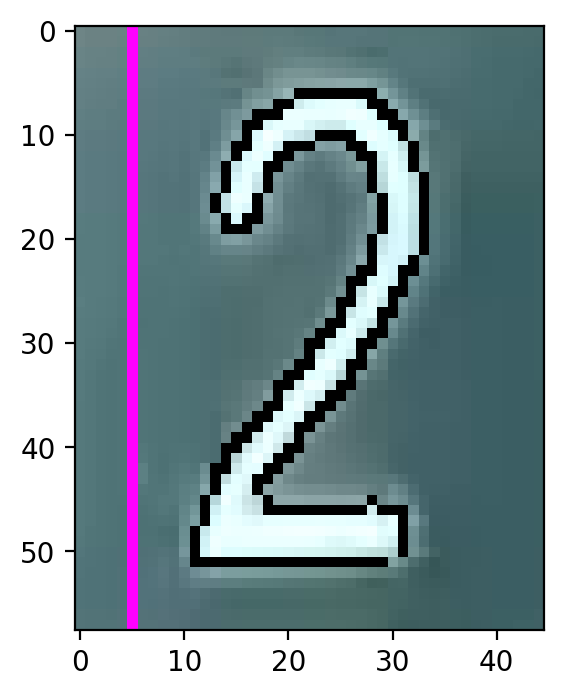

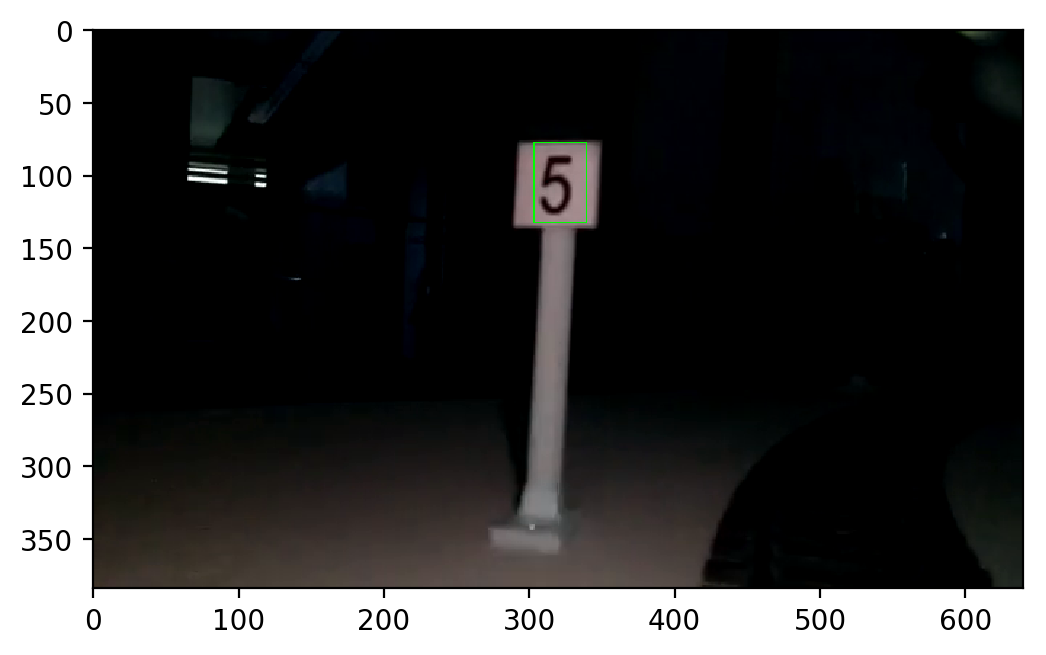

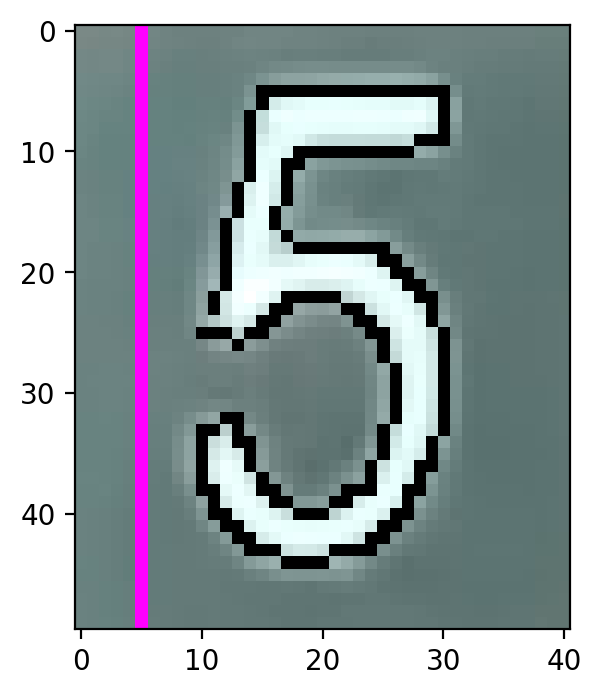

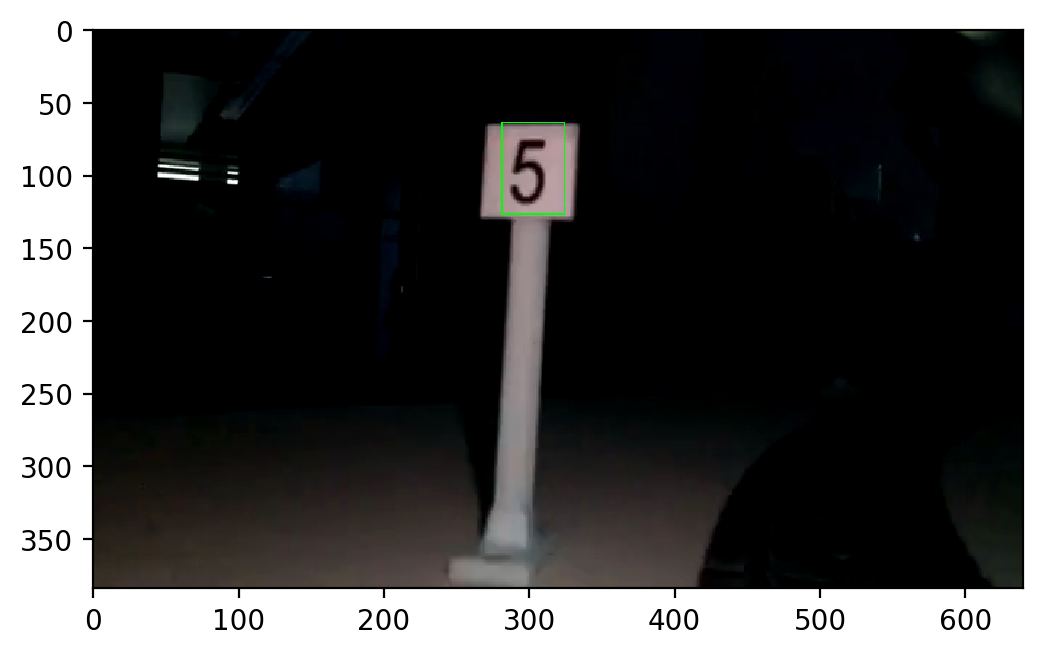

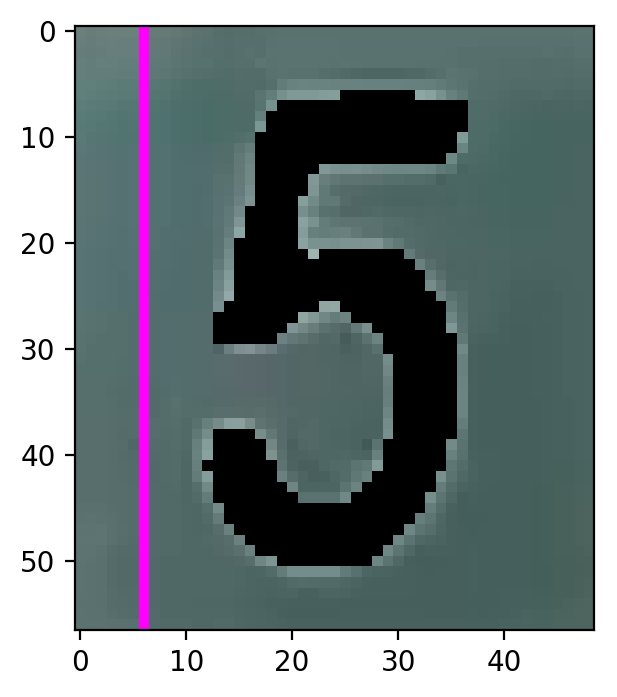

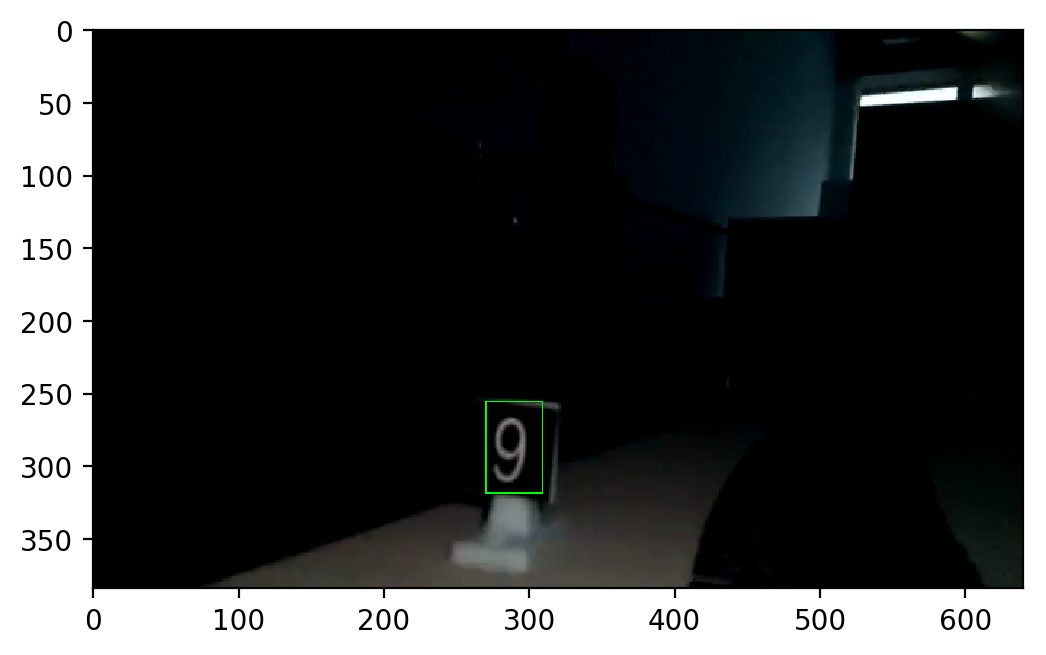

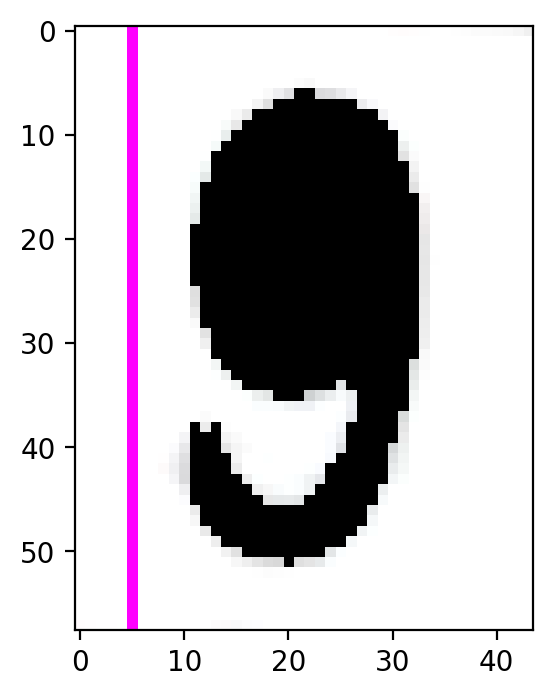

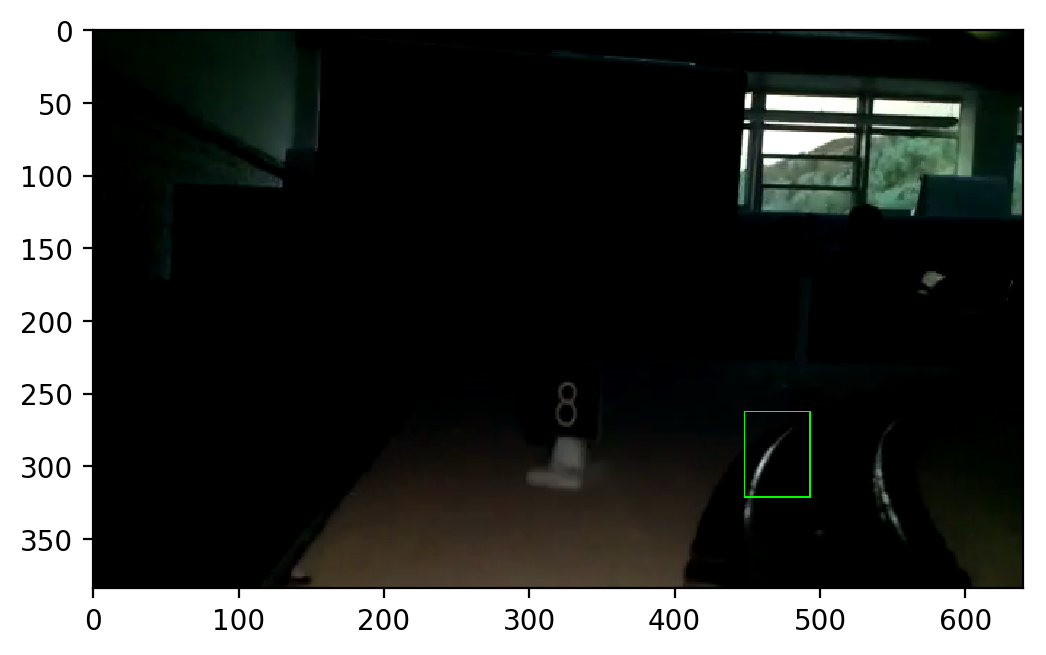

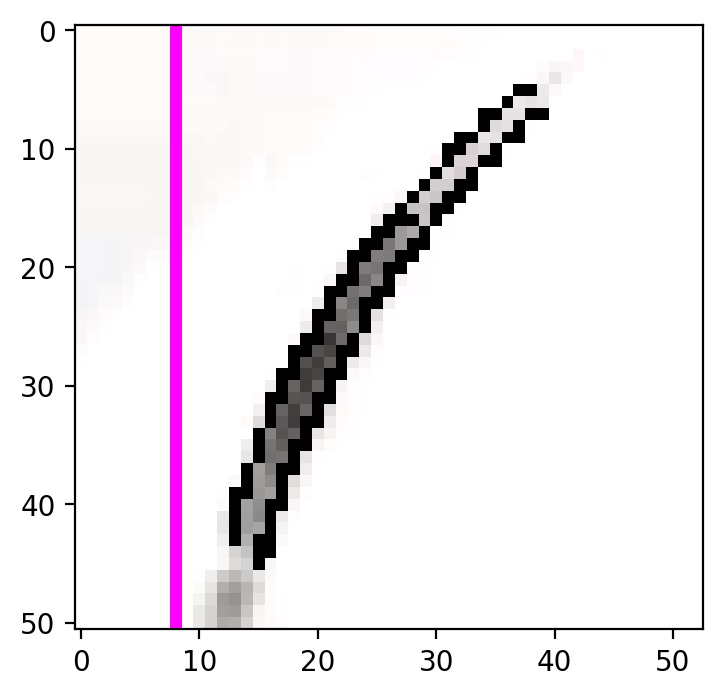

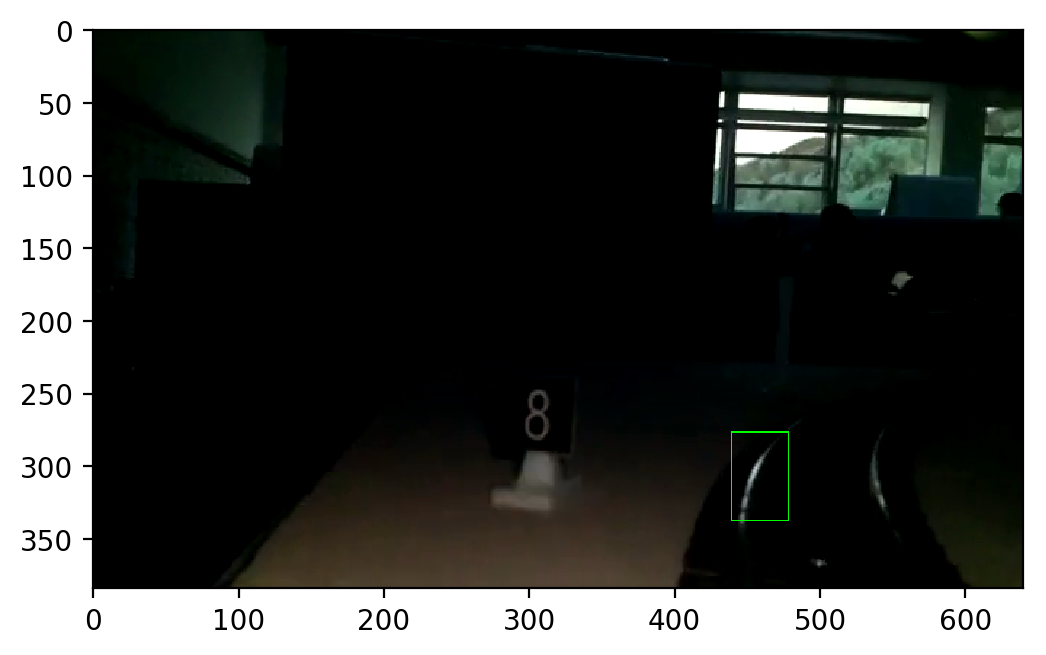

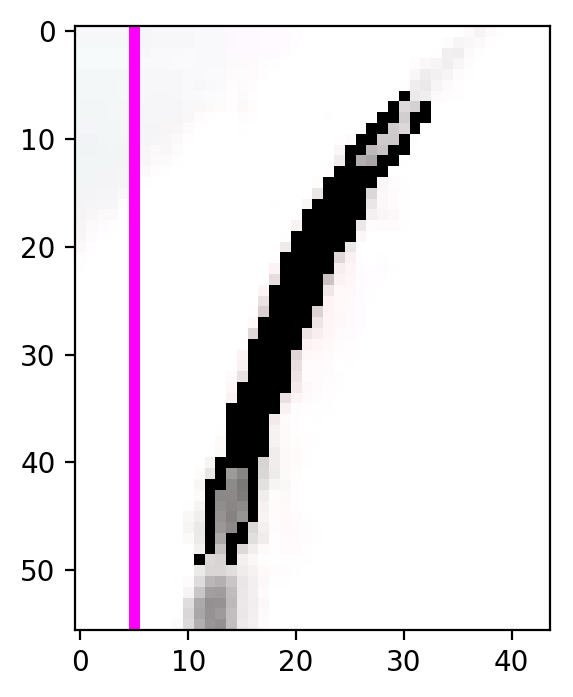

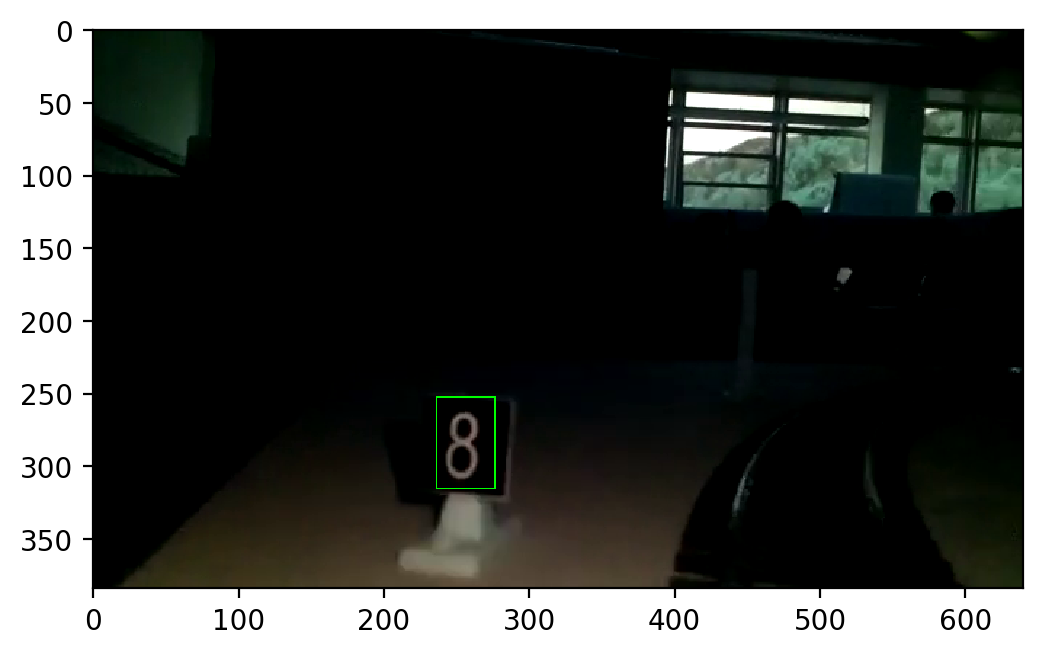

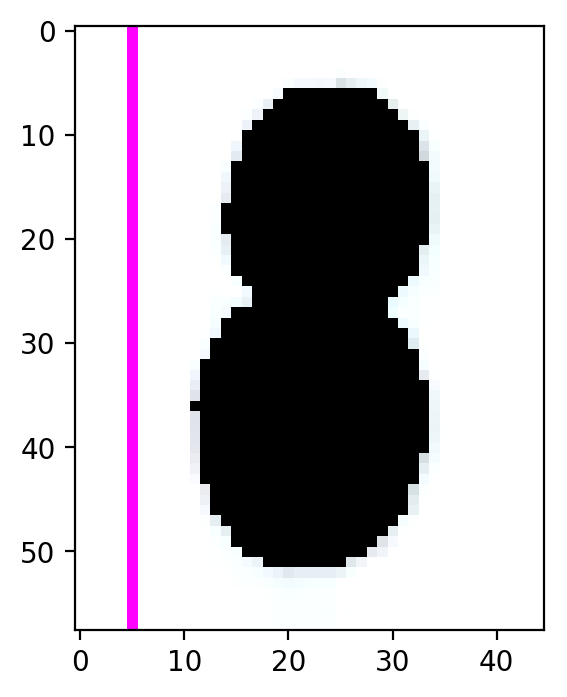

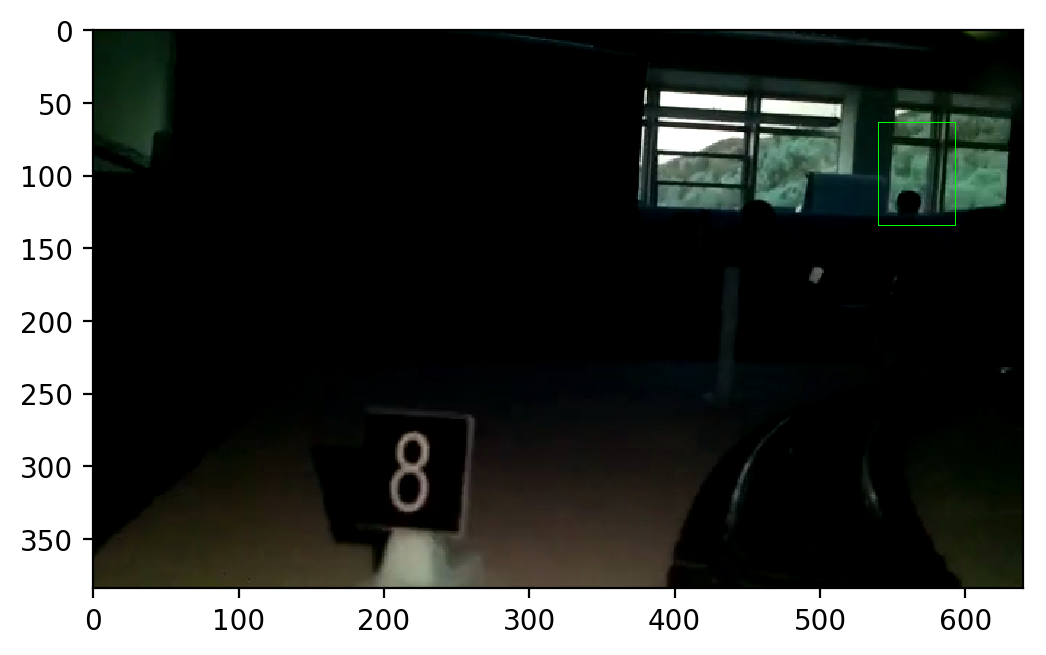

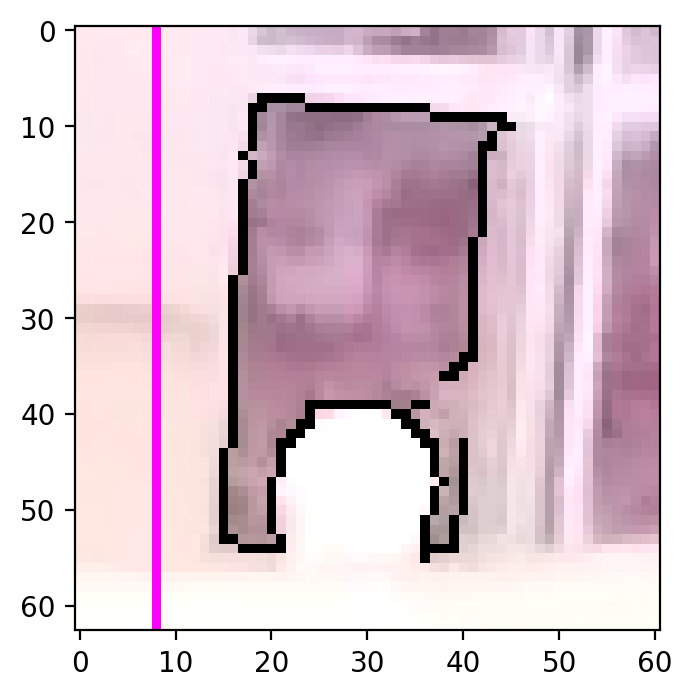

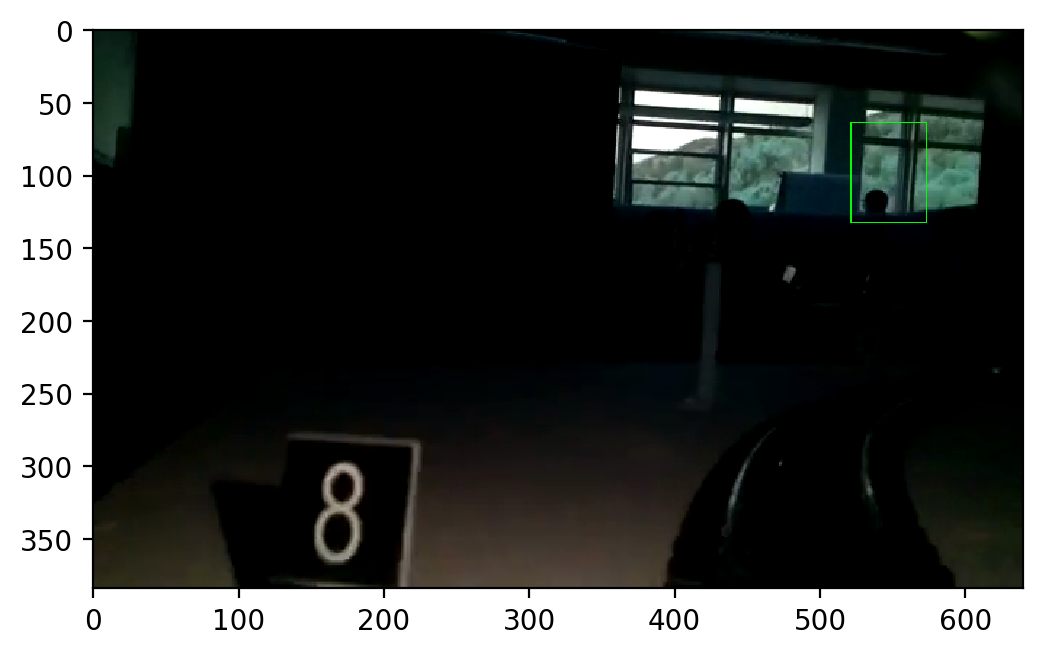

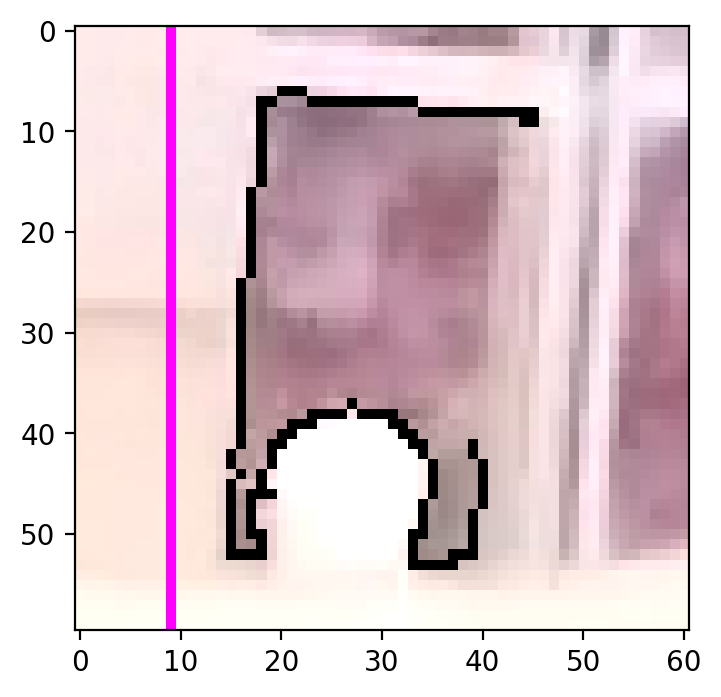

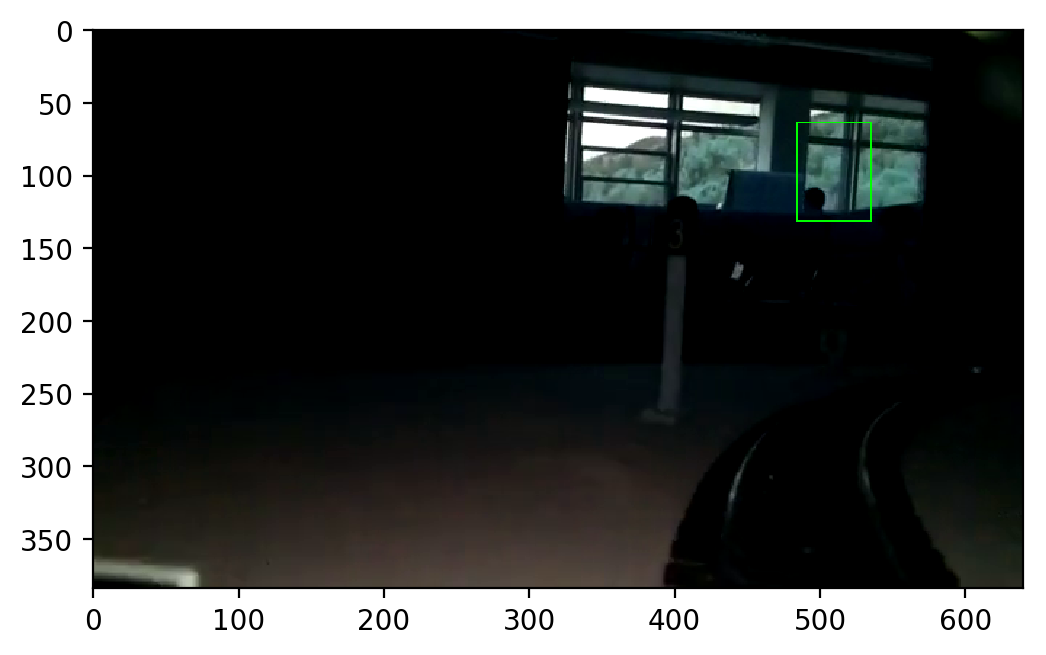

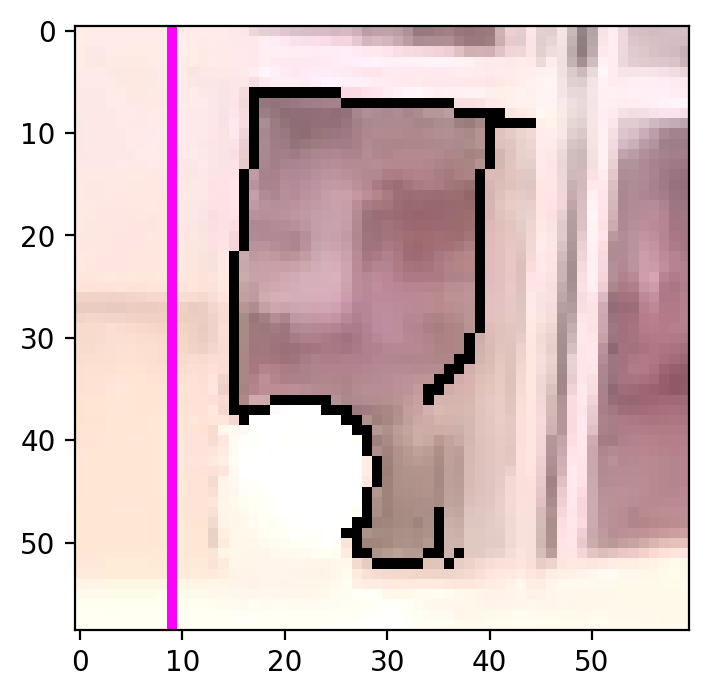

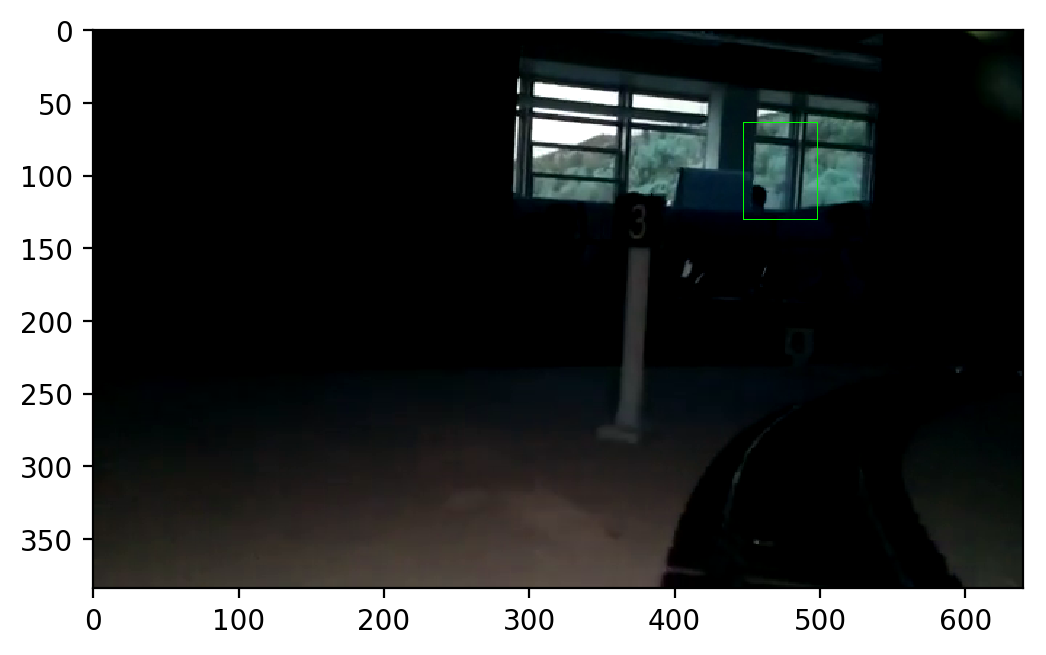

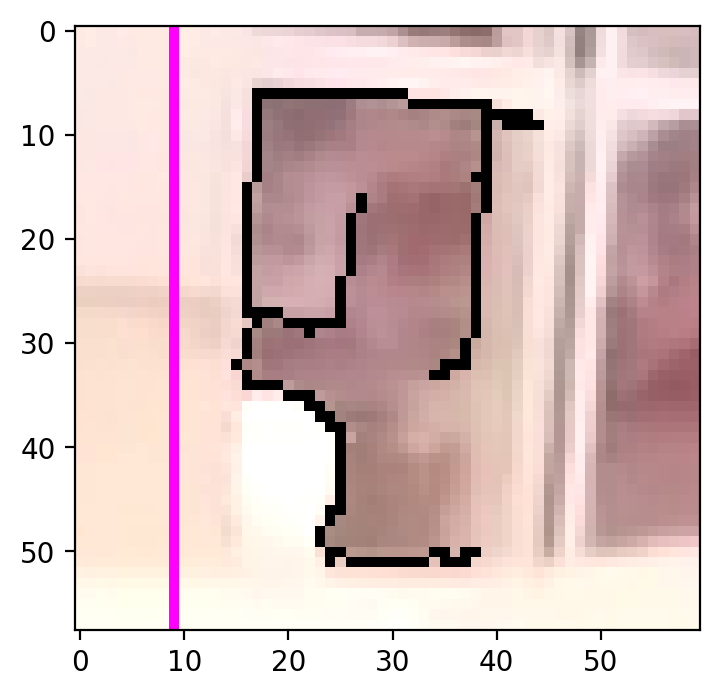

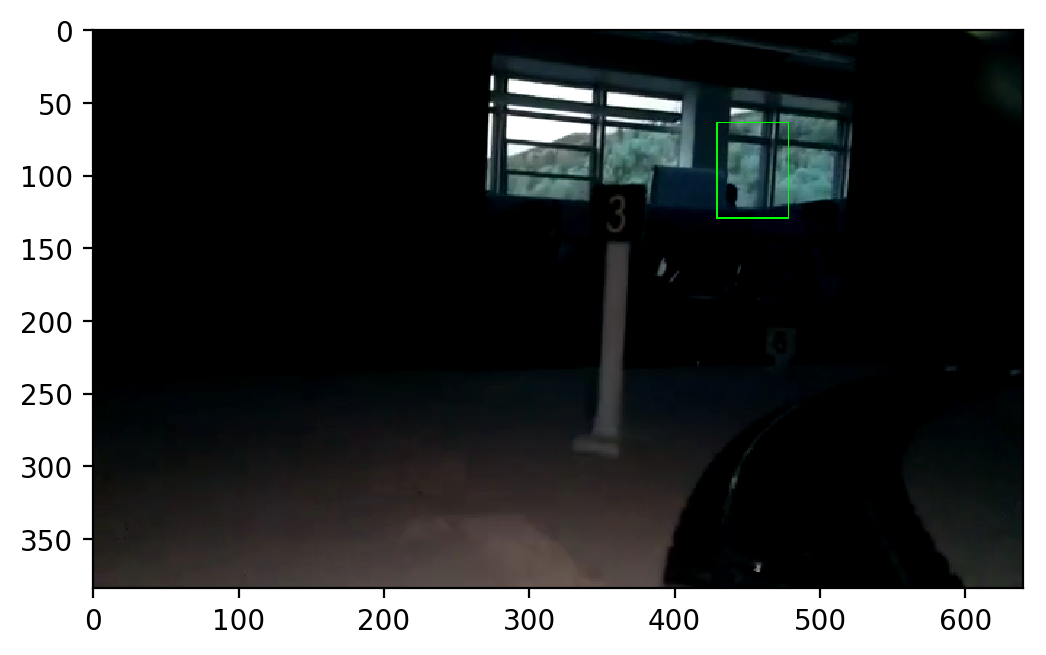

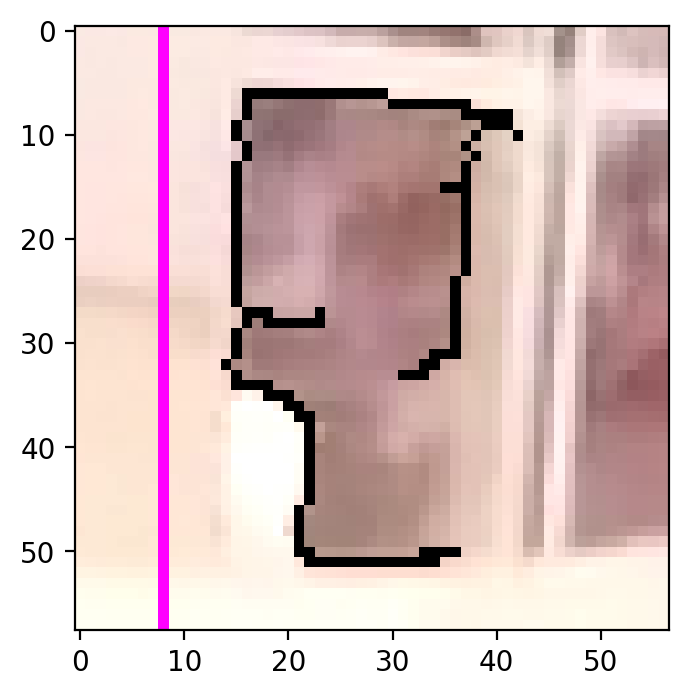

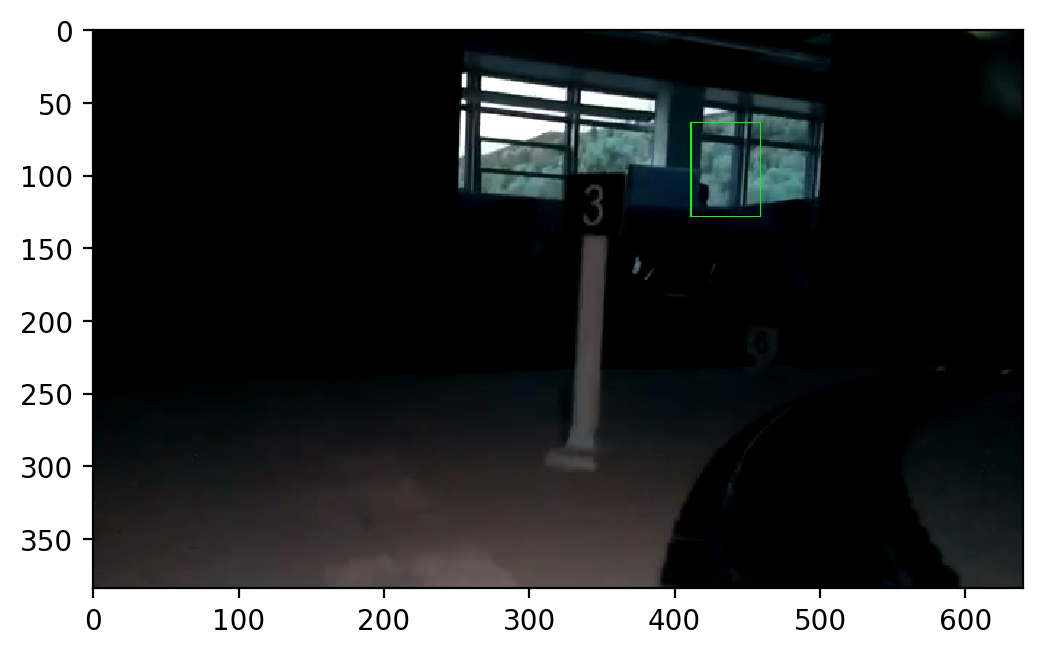

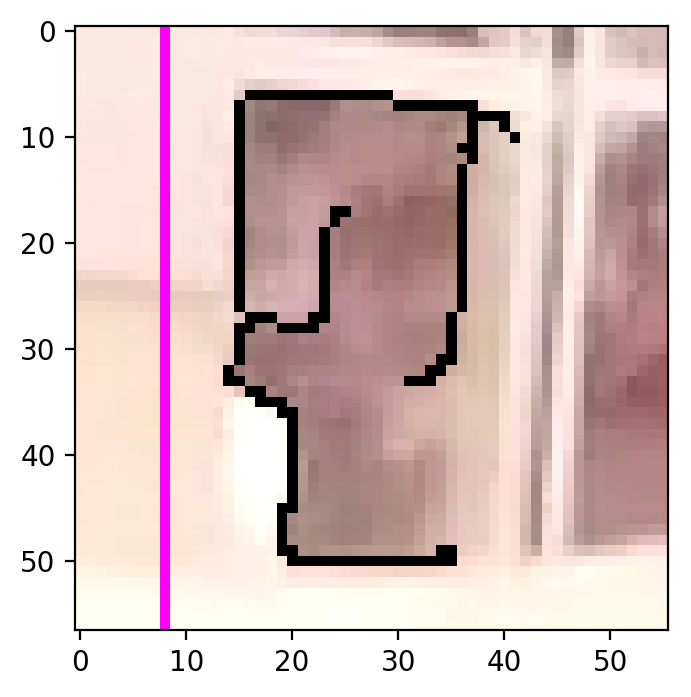

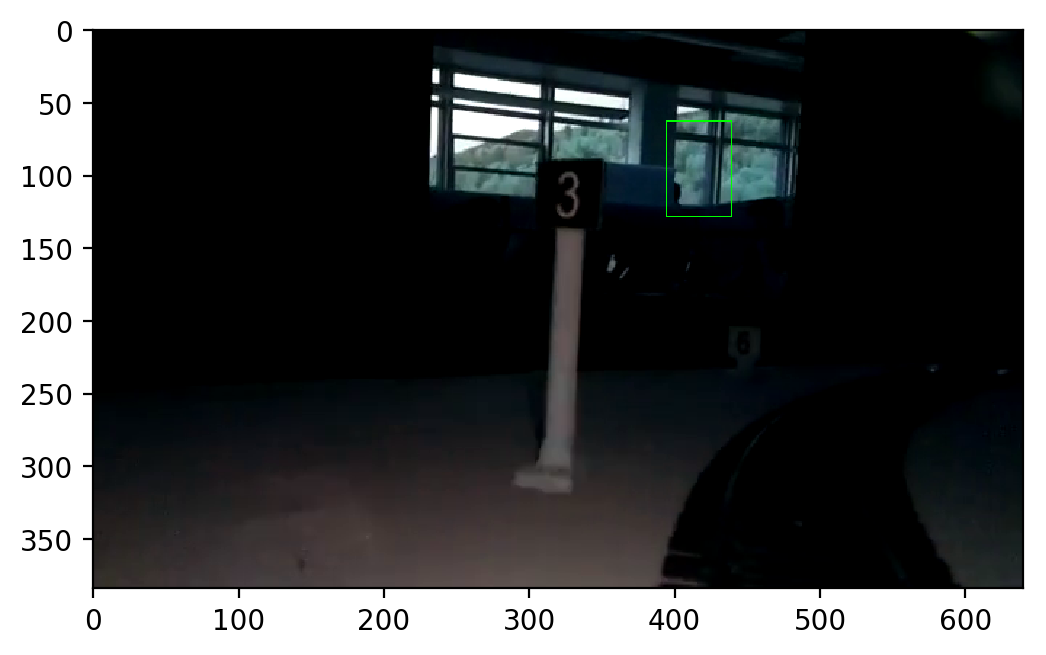

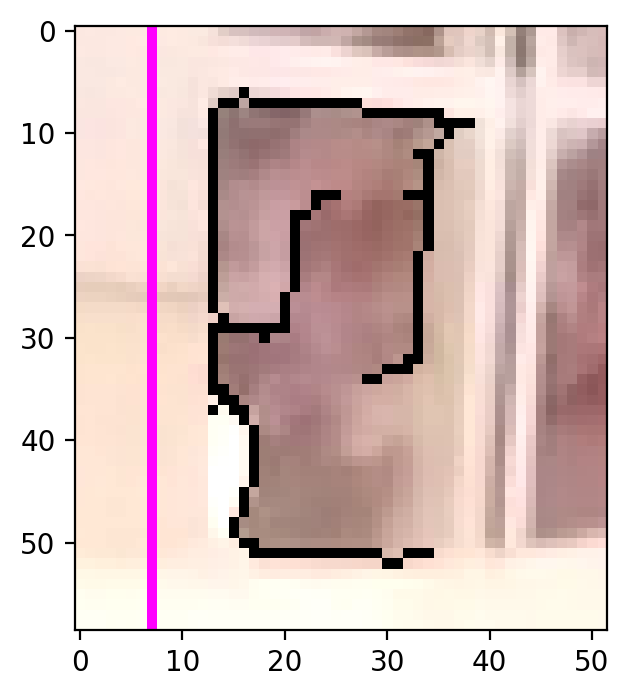

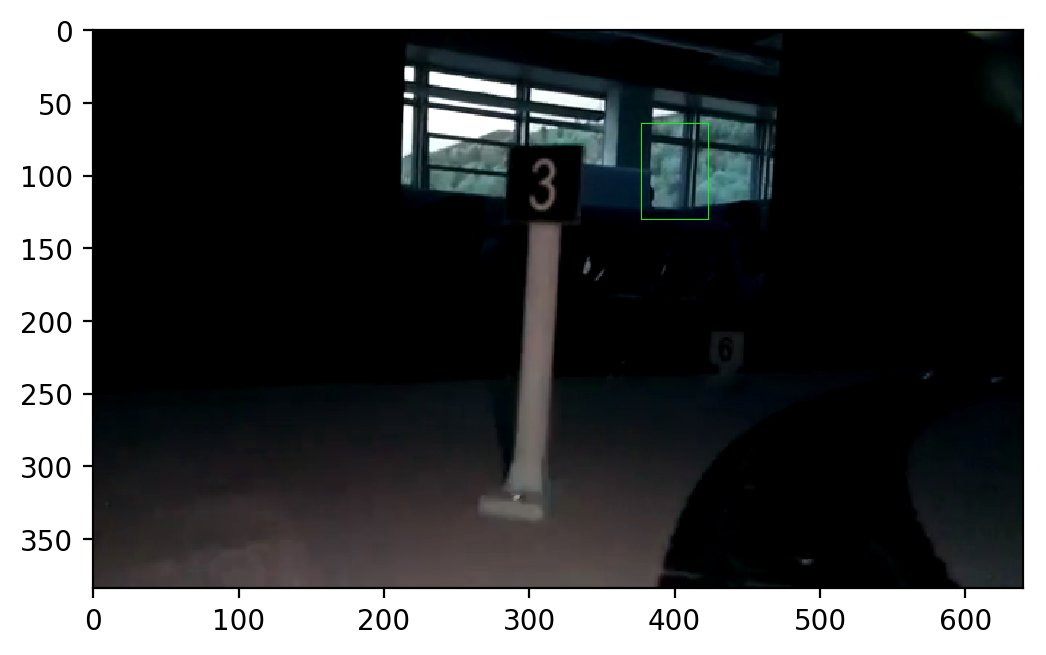

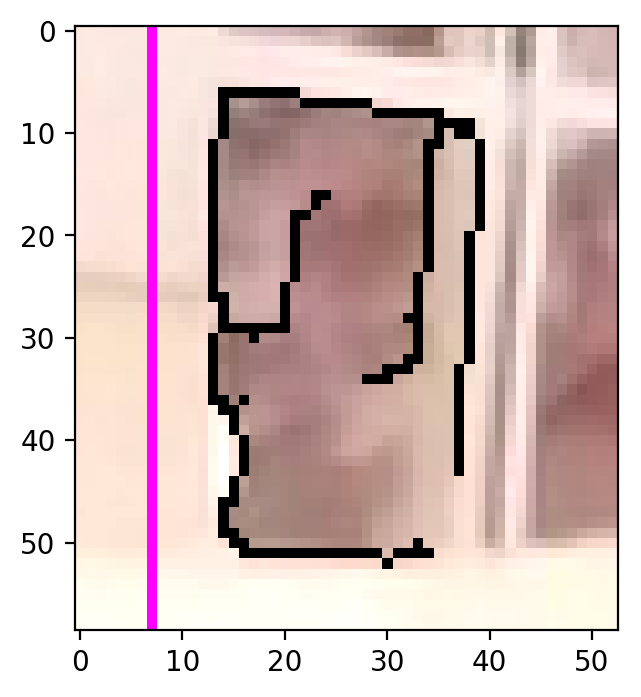

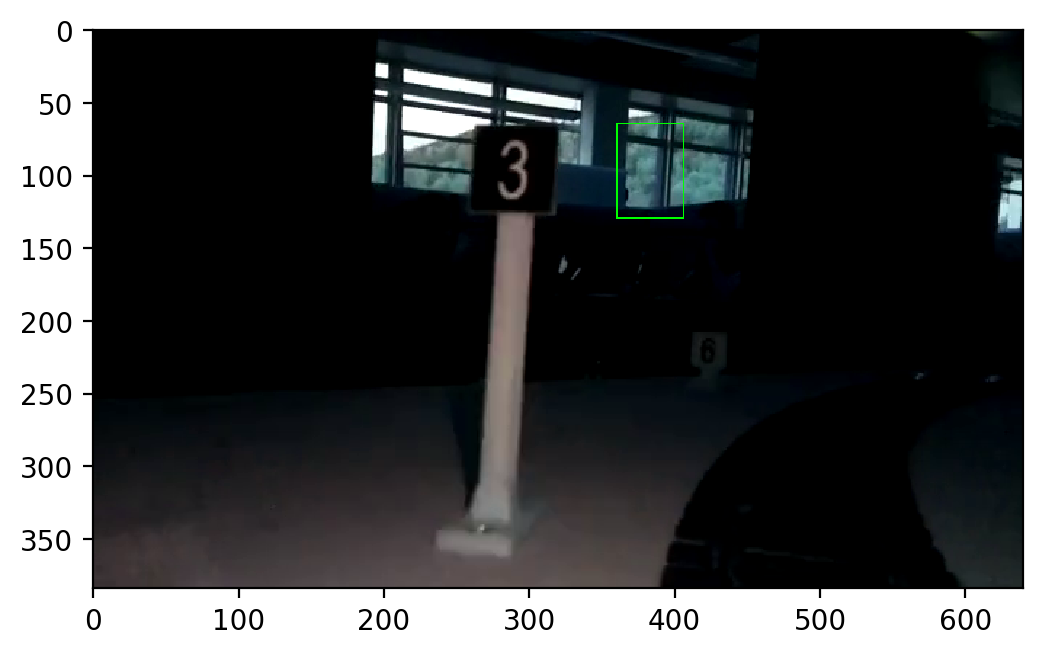

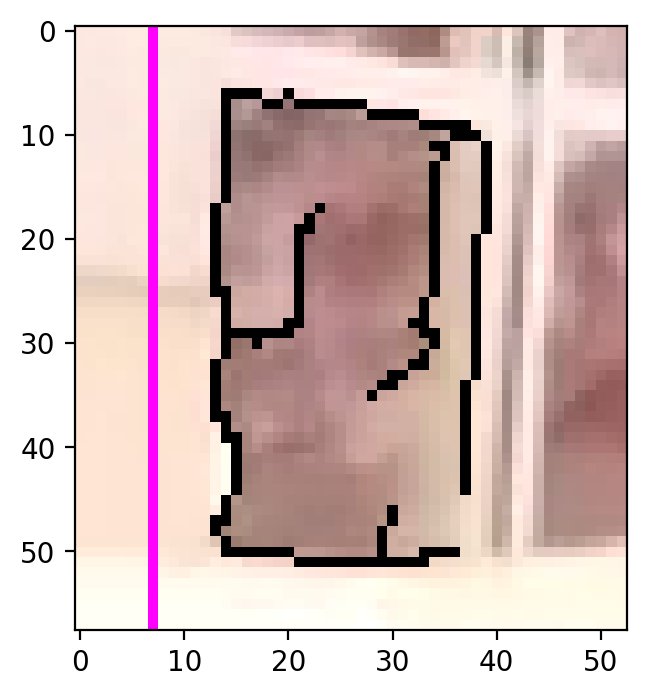

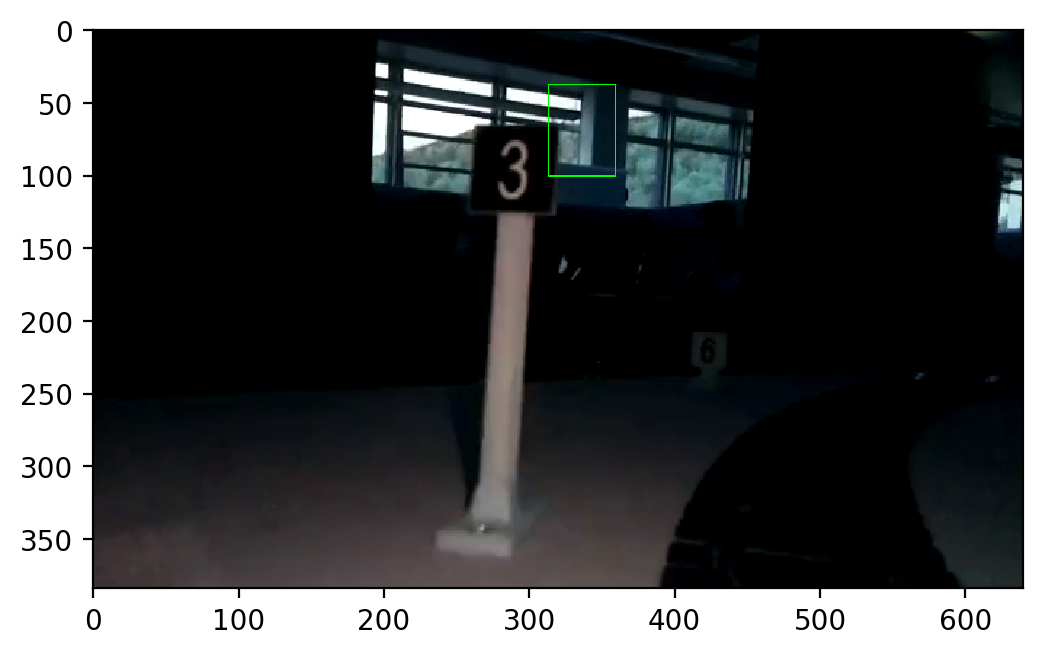

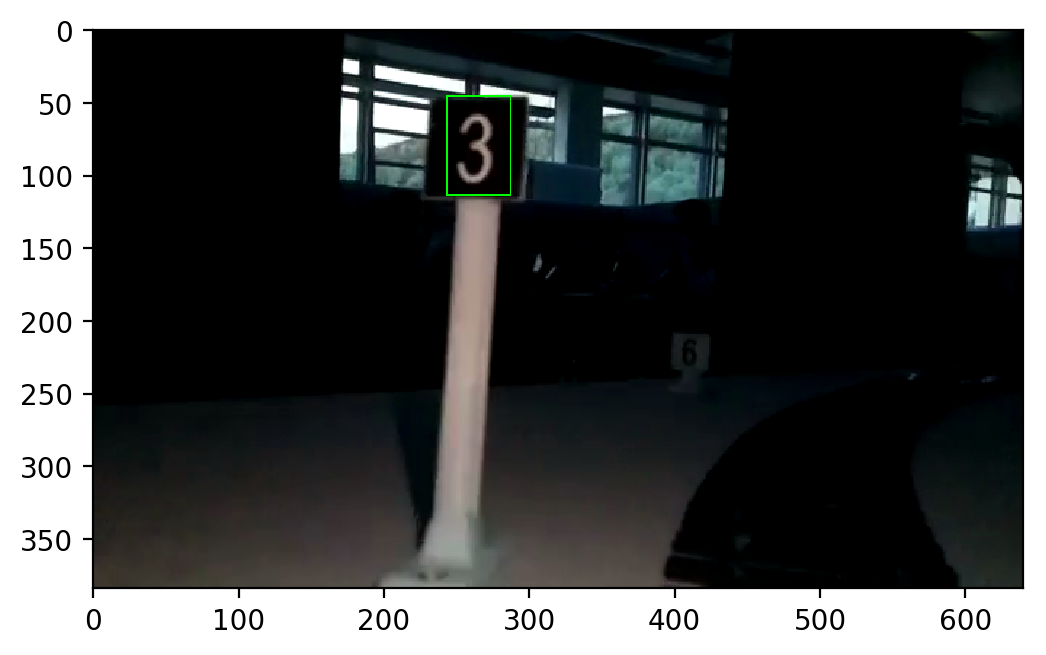

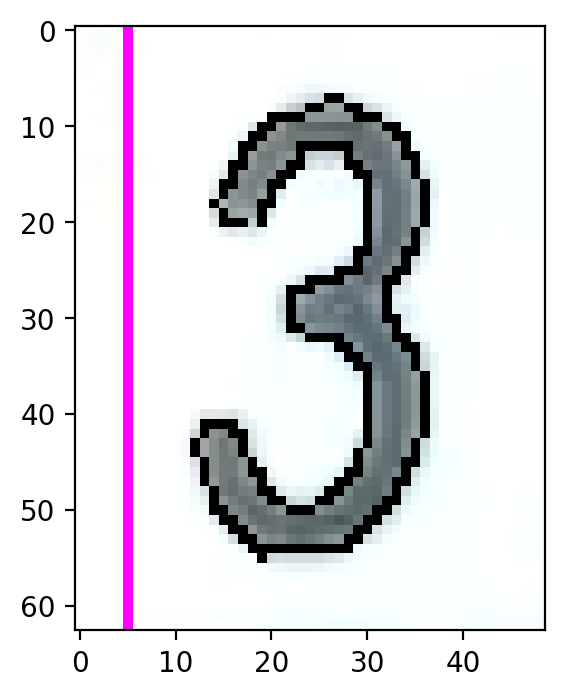

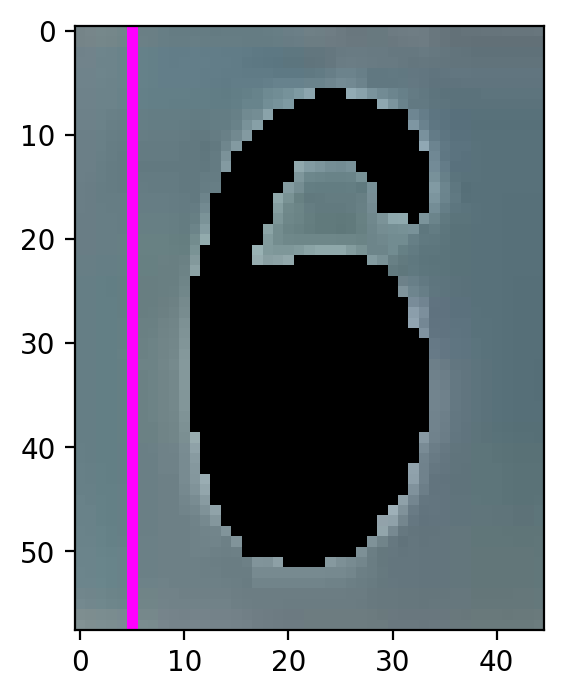

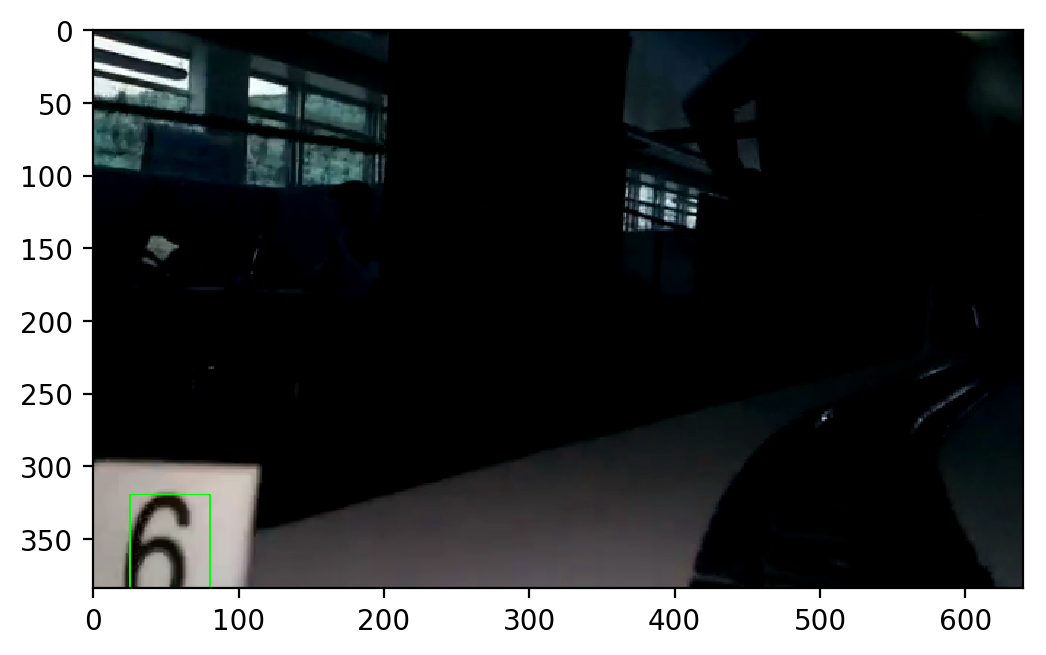

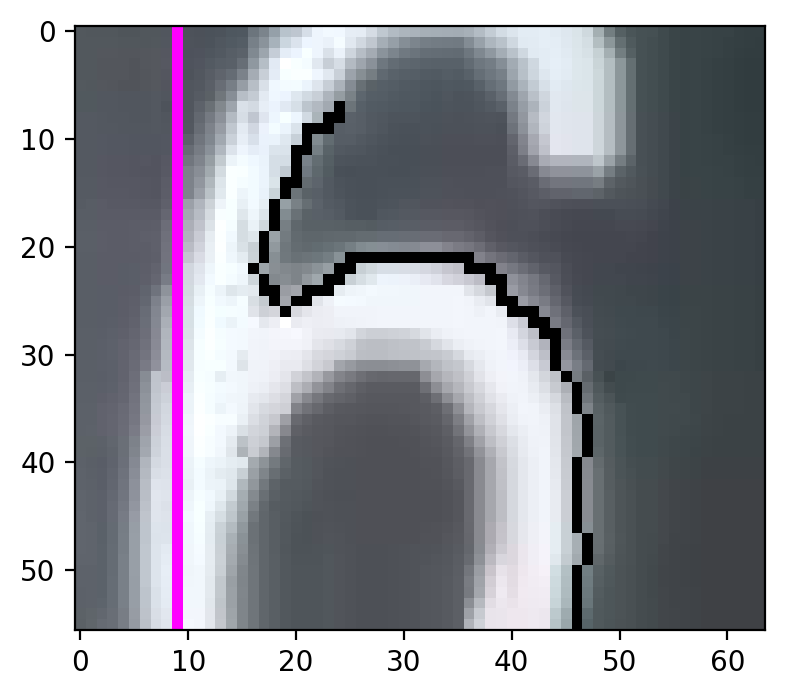

TypeError: 'NoneType' object is not subscriptable

In [4]:
#from pytesseract import image_to_string

vidcap = cv2.VideoCapture('Video_signalerkennung1.mp4')

count = 0
while True:
    success,img = vidcap.read()
    

    #print(img.shape)
    L = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    rcParams['figure.dpi']= 200
    #img = img[70: 150, 0:350]
    #plt.imshow(img, cmap='gray')
    #plt.show()
    for i in range (0,1):
        start = time.time()
        gray = cv2.cvtColor(img[:][:][::], cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gray,120,250)
        im2, contours, hierarchy = cv2.findContours(cv2.filter2D(canny, -1, L), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        counter = 0
        new_contour = []
        for i in range(0,len(contours)):
            epsilon = 0.1*cv2.arcLength(contours[i],True)
            approx = cv2.approxPolyDP(contours[i], epsilon, closed=True)
            if(abs(cv2.contourArea(contours[i])) > 10 and len(approx) == 2 and not(cv2.isContourConvex(approx))):
                new_contour.append(contours[i])
                x,y,w,h = cv2.boundingRect(contours[i])
                rel = h / w
                addh = int(h / 7)
                addw = int(w / 2)
                print()
                if(rel > 1.5 and h > 20 and h < 50 and w > 20 and w < 50 and y > 0 and x > 0):
                    cont = img.copy()
                    cv2.rectangle(cont, (x - addh, y - addw), (x + w + addw, y + h + addh), (0, 255, 0), 1)
                    plt.imshow(cont, cmap='gray')
                    plt.show()
                    #cv2.polylines(cont, [contours[i]], False, (255,255,255), 2)
                    cv2.fillPoly(cont, [contours[i]], (255,255,255))
                    #print(image_to_string(cv2.bitwise_not(cont[y - addw:y + h + addh,x - addh:x + w + addw]), lang='eng', config='--psm 10'))
                    #imshow(cv2.bitwise_not(cont[y - addh:y + h + addh,x - addw:x + w + addw]))
                    cropped =cont[y - addh:y + h + addh,x - addw:x + w + addw]
                    cropped = cv2.bitwise_not(cropped)
                    plt.imshow(cropped, cmap='gray')
                    plt.show()
                    counter = counter + 1
                    cv2.imwrite(r'C:\Users\corin\Documents\GitHub\image/file'+'_'+ str(time.time()) + '_'+ str(counter) + '.jpg', cropped)


    finish = time.time()
    #print('%.5ffps' % ((finish - start)))

